### Problem statement

Home Credit, to practice the end-to-end process of model development in Credit Risk for Banks, Financial Institutions and NBFCs.You would build a bank’s internal end-to-end scoring mechanism, based on the application information, clubbed with the raw bureau information.The primary objective of this study is to assist Home Credit in deciding which loan applications should be disbursed, and which should be rejected, based on the applicant’s past behaviour and application information.
Goal:
As a business analyst for Home Credit, you are supposed to first gather the information and clean it to make it usable.
Build a classification model to differentiate applicants between approves and rejects.

### Segment 1 :Importing the libraries

We will import the pandas, numby, seaborn, matplotlib. Also the panda's set option will help to view all the columns in the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

#### Segment 2 :Reading the application data set in the variable inp0 and previous application variable in the Data

In [2]:
data=pd.read_csv('applications_base.csv')

In [3]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
data.shape

(307511, 122)

In [5]:
bureau=pd.read_csv('bureau.csv')

In [6]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [7]:
bureau.shape

(1716428, 17)

### Segment 3 :The first step will do the sanity checkes that the head of the data frame, name of the columns, shape of the data set,to find the data types of the each columns and more important to find the missin values

In [8]:
data.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Segment- 4, Fixing the null's and Columns 

There are many columns have lot of missing values. The missing value % on 40 and over 40% will impact the analysis. In this case we are dropping those columns have more than 40% of missing values 

In [9]:
100*data.isnull().mean().sort_values()

SK_ID_CURR                       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0

In [10]:
null_data=pd.DataFrame(100*data.isnull().mean().sort_values()).reset_index()

In [11]:
null_data.rename(columns={'index':'column_name',0:'null_percent'},inplace=True)
null_data

column_name  null_percent
0                      SK_ID_CURR      0.000000
1         HOUR_APPR_PROCESS_START      0.000000
2      REG_REGION_NOT_WORK_REGION      0.000000
3     LIVE_REGION_NOT_WORK_REGION      0.000000
4          REG_CITY_NOT_LIVE_CITY      0.000000
5          REG_CITY_NOT_WORK_CITY      0.000000
6         LIVE_CITY_NOT_WORK_CITY      0.000000
7               ORGANIZATION_TYPE      0.000000
8                FLAG_DOCUMENT_21      0.000000
9                FLAG_DOCUMENT_20      0.000000
10               FLAG_DOCUMENT_19      0.000000
11               FLAG_DOCUMENT_18      0.000000
12               FLAG_DOCUMENT_17      0.000000
13               FLAG_DOCUMENT_16      0.000000
14               FLAG_DOCUMENT_15      0.000000
15               FLAG_DOCUMENT_14      0.000000
16               FLAG_DOCUMENT_13      0.000000
17               FLAG_DOCUMENT_12      0.000000
18               FLAG_DOCUMENT_11      0.000000
19               FLAG_DOCUMENT_10      0.000000
20                FLAG_DOCUMENT_9      0.000000
21                FLAG_DOCUMENT_8      0.000000
22                FLAG_DOCUMENT_7      0.000000
23                FLAG_DOCUMENT_6      0.000000
24                FLAG_DOCUMENT_5      0.000000
25                FLAG_DOCUMENT_4      0.000000
26                FLAG_DOCUMENT_3      0.000000
27                FLAG_DOCUMENT_2      0.000000
28     WEEKDAY_APPR_PROCESS_START      0.000000
29    REGION_RATING_CLIENT_W_CITY      0.000000
30     REG_REGION_NOT_LIVE_REGION      0.000000
31              NAME_HOUSING_TYPE      0.000000
32                   CNT_CHILDREN      0.000000
33               NAME_INCOME_TYPE      0.000000
34            NAME_EDUCATION_TYPE      0.000000
35             NAME_FAMILY_STATUS      0.000000
36           REGION_RATING_CLIENT      0.000000
37     REGION_POPULATION_RELATIVE      0.000000
38                     DAYS_BIRTH      0.000000
39                  DAYS_EMPLOYED      0.000000
40              DAYS_REGISTRATION      0.000000
41                DAYS_ID_PUBLISH      0.000000
42               AMT_INCOME_TOTAL      0.000000
43                FLAG_OWN_REALTY      0.000000
44                    CODE_GENDER      0.000000
45             NAME_CONTRACT_TYPE      0.000000
46                     FLAG_MOBIL      0.000000
47                 FLAG_EMP_PHONE      0.000000
48                FLAG_WORK_PHONE      0.000000
49               FLAG_CONT_MOBILE      0.000000
50                     FLAG_PHONE      0.000000
51                         TARGET      0.000000
52                     FLAG_EMAIL      0.000000
53                   FLAG_OWN_CAR      0.000000
54                     AMT_CREDIT      0.000000
55         DAYS_LAST_PHONE_CHANGE      0.000325
56                CNT_FAM_MEMBERS      0.000650
57                    AMT_ANNUITY      0.003902
58                AMT_GOODS_PRICE      0.090403
59                   EXT_SOURCE_2      0.214626
60       DEF_30_CNT_SOCIAL_CIRCLE      0.332021
61       DEF_60_CNT_SOCIAL_CIRCLE      0.332021
62       OBS_60_CNT_SOCIAL_CIRCLE      0.332021
63       OBS_30_CNT_SOCIAL_CIRCLE      0.332021
64                NAME_TYPE_SUITE      0.420148
65     AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
66      AMT_REQ_CREDIT_BUREAU_DAY     13.501631
67      AMT_REQ_CREDIT_BUREAU_MON     13.501631
68     AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
69     AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
70      AMT_REQ_CREDIT_BUREAU_QRT     13.501631
71                   EXT_SOURCE_3     19.825307
72                OCCUPATION_TYPE     31.345545
73            EMERGENCYSTATE_MODE     47.398304
74                 TOTALAREA_MODE     48.268517
75   YEARS_BEGINEXPLUATATION_MODE     48.781019
76    YEARS_BEGINEXPLUATATION_AVG     48.781019
77   YEARS_BEGINEXPLUATATION_MEDI     48.781019
78                  FLOORSMAX_AVG     49.760822
79                 FLOORSMAX_MEDI     49.760822
80                 FLOORSMAX_MODE     49.760822
81                 HOUSETYPE_MODE     50.176091
82                 LIVINGAREA_AVG     

In [12]:
null_column=null_data[null_data['null_percent']>=40]['column_name'].to_list()

In [13]:
null_column

['EMERGENCYSTATE_MODE',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'HOUSETYPE_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'WALLSMATERIAL_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'EXT_SOURCE_1',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'OWN_CAR_AGE',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'COMMON

In [14]:
data1=data.drop(null_column,axis=1)

In [15]:
data1.shape

(307511, 73)

Those are columns having more than 40% of missing values has been removed from report,Since it will not provide useful prediction or bias the prediction

#### Analyze the Flag Document column


In the application data set there many columns start with Flag which indicate the documents which is collect from the applicant wheather they submitted the documents are not.

In [16]:
Flag_col=[]

for col in data1:
    if col.startswith('FLAG_'):
        Flag_col.append(col)

In [17]:
data[Flag_col].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

The above flagged columns will not provide much anlysing information , since all the columns with the value of 0 & 1 or N & Y. With that information we could not conculde or understand any insist for this case study. Let's we anaylyse the correlation with our target variable for the flagged columns

In [18]:
data1[Flag_col + ['TARGET']].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TARGET  
0                 0                 0       1  
1                 0                 0       0  
2                 0                 0       0  
3                 0                 0       0  
4                 0                 0       0

In [19]:
target_vs_falg=data1[Flag_col + ['TARGET']].head()

<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

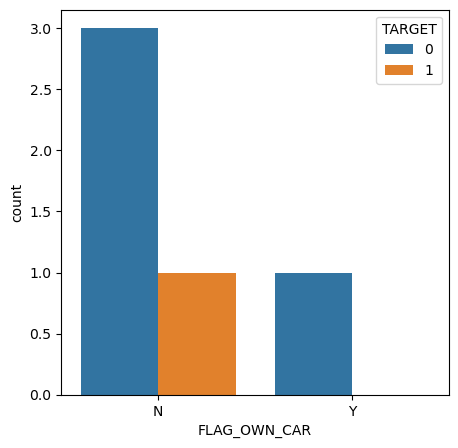

In [20]:
plt.figure(figsize=(5,5))

sns.countplot(data=target_vs_falg, x='FLAG_OWN_CAR',hue='TARGET')

#### The above graph which gives the analysis that whoever having own car will not be a defualter but before we come to the conclusion will check the relationship for all other flaged columns 

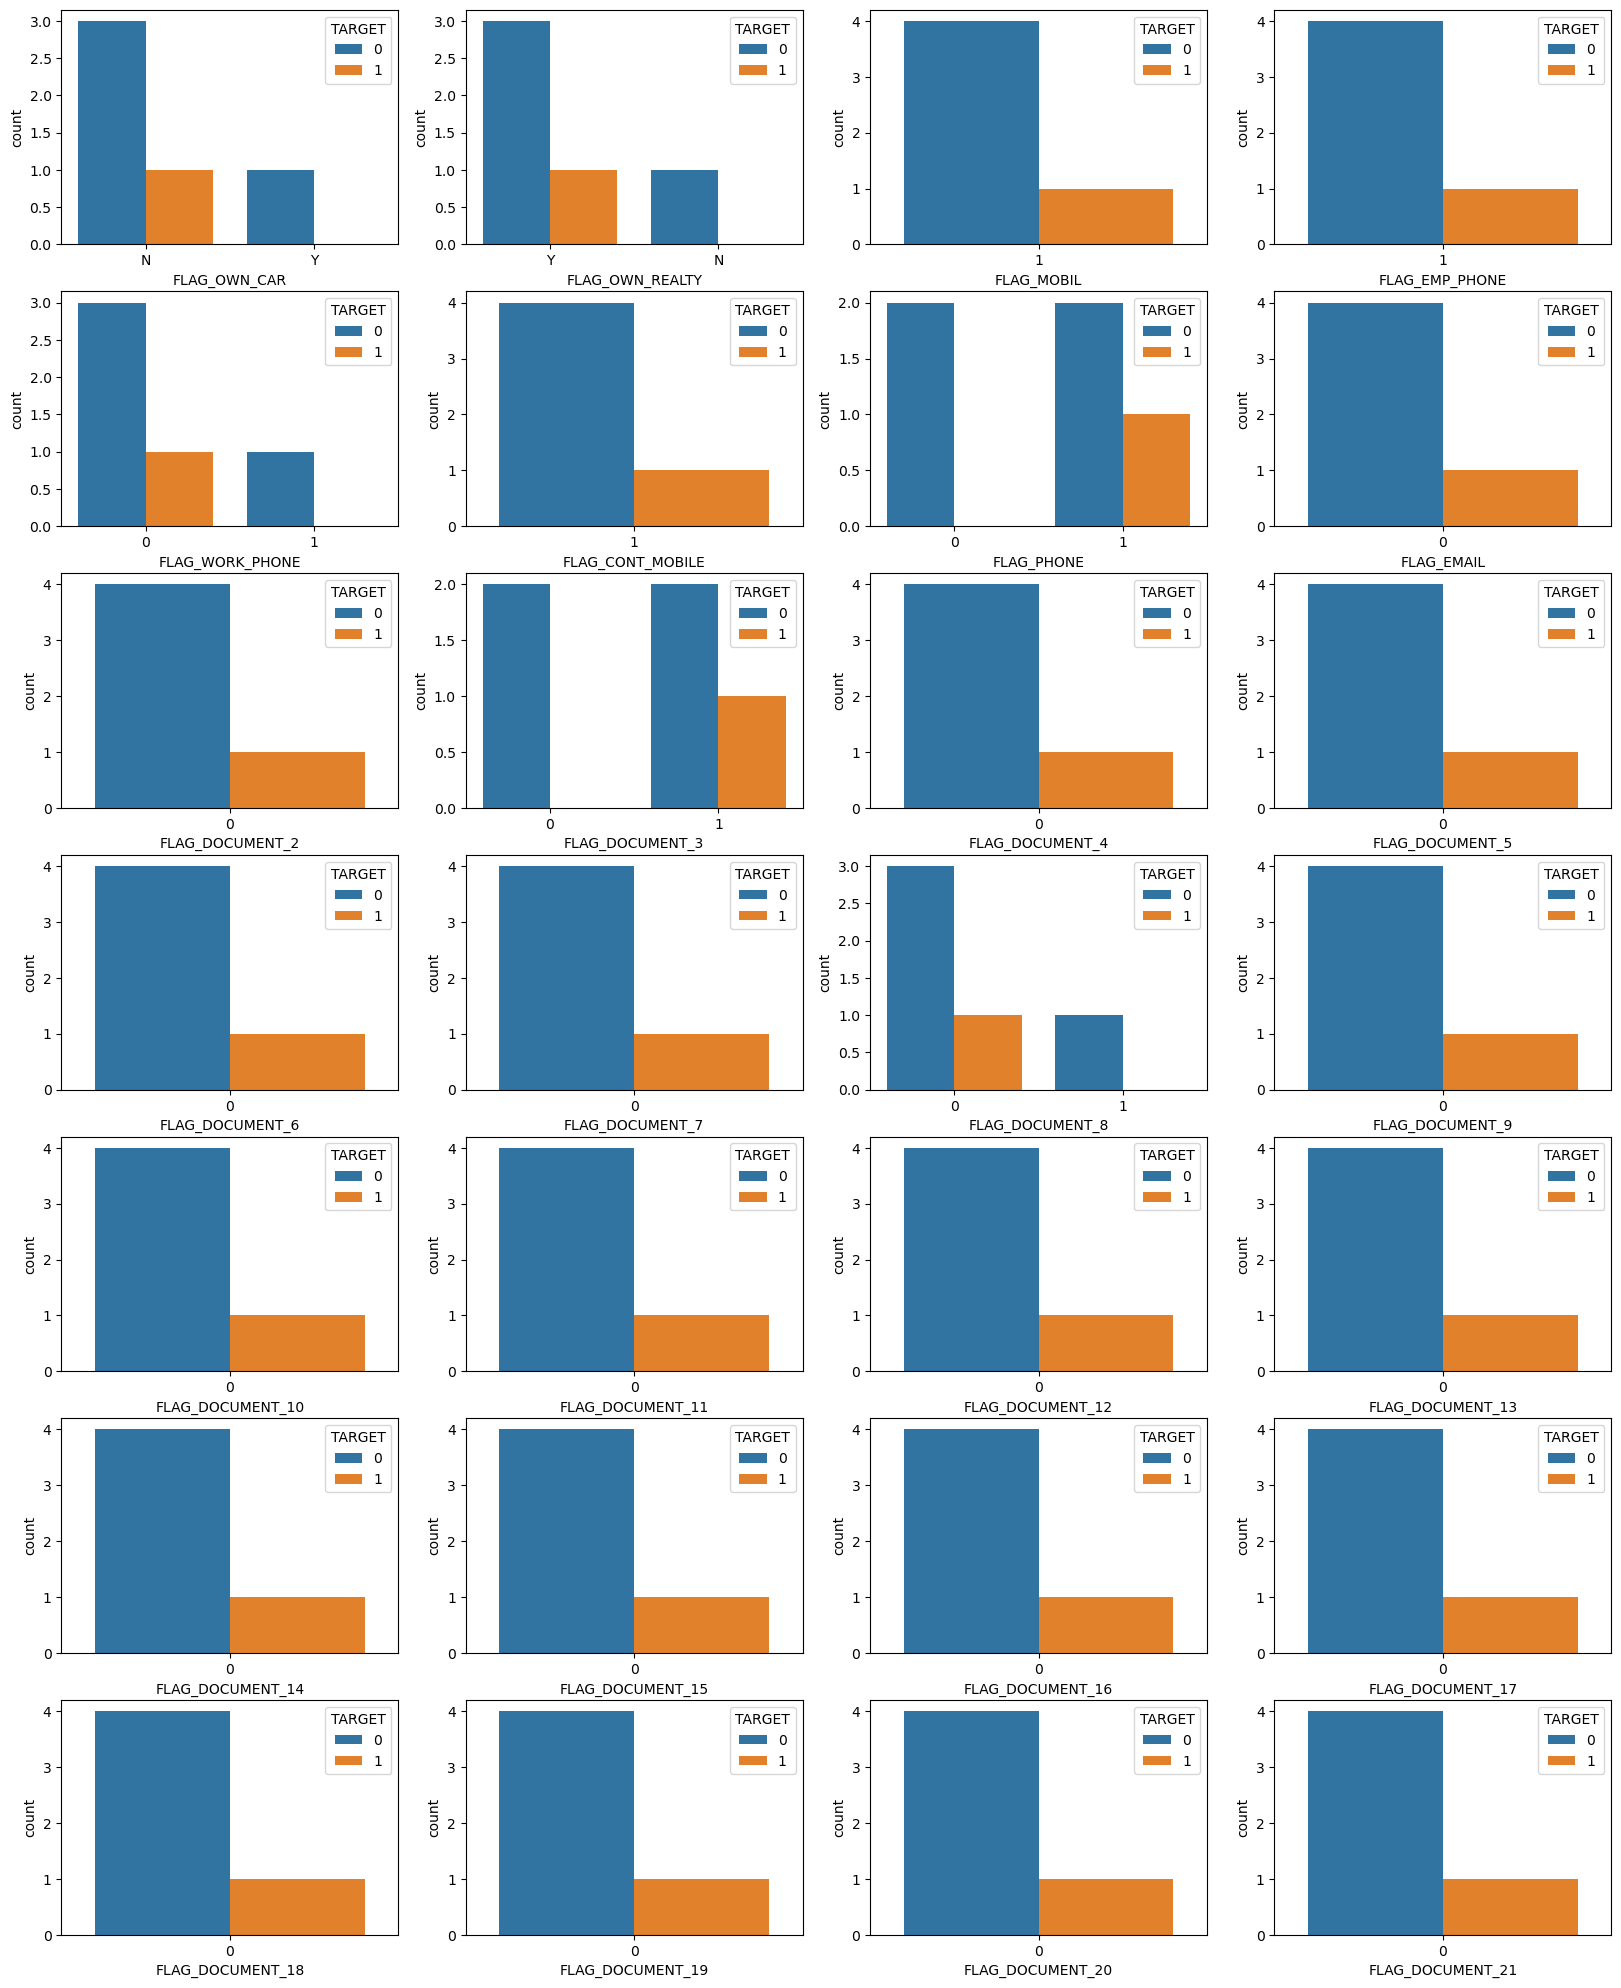

In [21]:
plt.figure(figsize=(20,25))
for i, col in enumerate(Flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=target_vs_falg, x=col,hue='TARGET')

The above anlysis except few grap all are having only the repairs records which indicate this documents more likly not required for all the customers. since the above plots are insist theat who ever doesn't submit the flag documents of 2 to 21 looks like there is repairs or non-defaulters. Before drop the entire flagged columns let we do one more step to find the co-relation for the first 8 flagged columns

In [22]:
Flag_col[:8]

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [23]:
Flag_corlation=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                'FLAG_PHONE','FLAG_EMAIL','TARGET']

In [24]:
Flag_corlation

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'TARGET']

In [25]:
Flag_corlation_df= data1[Flag_corlation]

In [26]:
Flag_corlation_df.head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  TARGET  
0                 1           1           0       1  
1                 1           1           0       0  
2                 1           1           0       0  
3                 1           0           0       0  
4                 1           0           0       0

In [27]:
Flag_corlation_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [28]:
Flag_corlation_df['FLAG_OWN_CAR']=Flag_corlation_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
Flag_corlation_df['FLAG_OWN_REALTY']=Flag_corlation_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

In [29]:
Flag_corlation_df.head()

FLAG_OWN_CAR  FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             0                1           1               1                0   
1             0                0           1               1                0   
2             1                1           1               1                1   
3             0                1           1               1                0   
4             0                1           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  TARGET  
0                 1           1           0       1  
1                 1           1           0       0  
2                 1           1           0       0  
3                 1           0           0       0  
4                 1           0           0       0

In [30]:
flag_cor=round(Flag_corlation_df.corr(),2)

<Axes: >

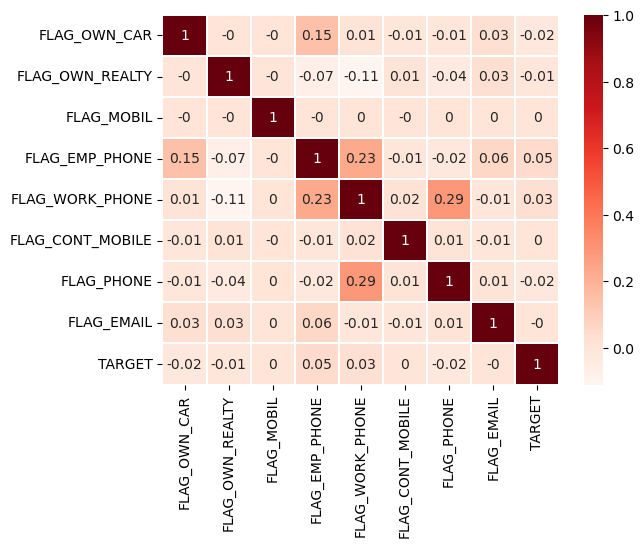

In [31]:
sns.heatmap(flag_cor,cmap='Reds',annot=True,linewidth=.25)

#### The above hist plot clearly indicate that there is no co-relation of flagged column with the target variable . Because the corelation coefficient values does not fall between the -0.8 to 0.8 , so let we consider these columns are considered as not signifigent information and drop from the dataset and assign with new name as inp0_flag_rmvd. Now our total columns is turn down into 47

In [32]:
data1=data1.drop(['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1)

In [33]:
data1.shape

(307511, 47)

## Let's check the missing value and impute 

In [34]:
100*data1.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

There are two more column have the below 40% of missing values but when we reviewed the description of the columns more likely indicate its like score from external data score. with that we could not understand what is the external source and what is the range of the score and all. So let's we drop these columns and set in to the new data frame name as " inp0_source_rmvd"

In [35]:
data1[['EXT_SOURCE_3','EXT_SOURCE_2','TARGET']].corr()

EXT_SOURCE_3  EXT_SOURCE_2    TARGET
EXT_SOURCE_3      1.000000      0.109167 -0.178919
EXT_SOURCE_2      0.109167      1.000000 -0.160472
TARGET           -0.178919     -0.160472  1.000000

<Axes: >

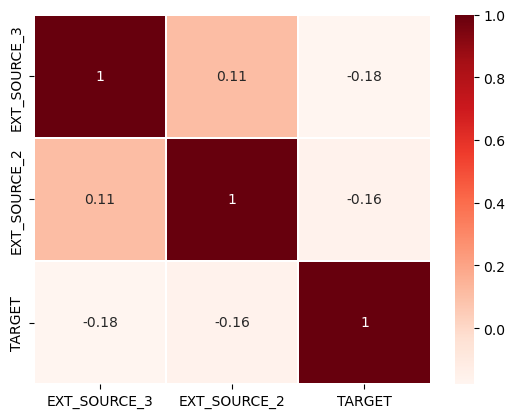

In [36]:
sns.heatmap(data=data1[['EXT_SOURCE_3','EXT_SOURCE_2','TARGET']].corr(),cmap='Reds',linewidth=.25,annot=True)

In [37]:
data1=data1.drop(['EXT_SOURCE_3','EXT_SOURCE_2'],axis=1)

In [38]:
data1.shape

(307511, 45)

## Imputing missing Values and handling outliers

On on the count of family members columns we have only 2 values are missing. Hence we can impute the mode value in place of the missing value to make no null in that column

In [39]:
data1['CNT_FAM_MEMBERS'].isnull().sum()

2

In [40]:
data1['CNT_FAM_MEMBERS'].mode()[0]

2.0

In [41]:
data1['CNT_FAM_MEMBERS']=data1['CNT_FAM_MEMBERS'].fillna(data1['CNT_FAM_MEMBERS'].mode()[0])

In [42]:
data1['CNT_FAM_MEMBERS'].isnull().sum()

0

The next columns we have huge missing values, which is more likely 30% of the volumne in the data set. If we assigned these missing value as unknown will be impacting the entire anylyse. So I am going to use the mode value to impute the missing value in the Occupation_type columns.

In [43]:
data1['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [44]:
data1['OCCUPATION_TYPE'].isnull().sum()

96391

In [45]:
data1['OCCUPATION_TYPE']=data1['OCCUPATION_TYPE'].fillna(data1['OCCUPATION_TYPE'].mode()[0])

In [46]:
data1['OCCUPATION_TYPE'].isnull().sum()

0

In [47]:
data1['OCCUPATION_TYPE'].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

We have almost covered all the categorical columns of missing values and the final one we have name_type suite with lower missing value that also filled with mode value of the columns. Let's we anlyse and impute missing value for the numeric columns.

In [48]:
100*data1.isnull().mean().sort_values()

SK_ID_CURR                      0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
DAYS_EMPLOYED                   0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
DAYS_BIRTH                      0.000000
CNT_FAM_MEMBERS                 0.000000
NAME_HOUSING_TYPE               0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_POPULATION_RELATIVE      0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN    

In [49]:
data1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [50]:
data1.CODE_GENDER.replace('XNA', 'F', inplace= True )
data1.NAME_TYPE_SUITE.replace(['Other_B', 'Other_A', 'Group of people'], 'Other', inplace= True)

In [51]:
data1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other                2907
Name: NAME_TYPE_SUITE, dtype: int64

Based on the input gathered in the example modue sessions and the experts recomendation i am going to impute the median value in the place of null values. Becuase the numberic data have out liers which is impact the mean value too. When analyse the mean and median the median value is looks considerable to impute the missing values. I am going to apply the same logic for all the amount numeric columns

In [52]:
data1['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [53]:
data1['AMT_ANNUITY'].fillna(data1['AMT_ANNUITY'].median(),inplace=True)

In [54]:
data1['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [55]:
data1['AMT_ANNUITY'].isnull().sum()

0

In [56]:
data1=data1.drop(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'],axis=1)

In [57]:
100*data1.isnull().mean().sort_values()

SK_ID_CURR                      0.000000
DAYS_REGISTRATION               0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
DAYS_EMPLOYED                   0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
DAYS_BIRTH                      0.000000
DAYS_ID_PUBLISH                 0.000000
NAME_HOUSING_TYPE               0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
REGION_POPULATION_RELATIVE      0.000000
CNT_CHILDREN    

### Let's impute the median value for rest of the amount_req column

In [58]:
amount_column=[]

for col in data1.columns:
    if col.startswith('AMT_REQ_CREDIT'):
        amount_column.append(col)

In [59]:
amount_column

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [60]:
for col in amount_column:
    data1[col]=data1[col].fillna(data1[col].median())

In [61]:
data1['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [62]:
100*data1.isnull().mean().sort_values()

SK_ID_CURR                     0.000000
CNT_FAM_MEMBERS                0.000000
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
OCCUPATION_TYPE                0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_EMPLOYED                  0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000


In [63]:
data1['AMT_GOODS_PRICE'].agg(['min','median','max'])

min         40500.0
median     450000.0
max       4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [64]:
data1['AMT_GOODS_PRICE'].fillna((data1['AMT_GOODS_PRICE'].median()),inplace=True)

In [65]:
data1['AMT_GOODS_PRICE'].isnull().sum()

0

#### Analyse and correct the data types

There are few columns name start with DAYS but the data's are mentioned as int. Also its containes the negative values.
looks like these are categorical columns but wrongly assigned into int data types. Let's change the data type and bins in the different categorical value

In [66]:
data1['DAYS_BIRTH']=abs(data1['DAYS_BIRTH'])

In [67]:
data1['DAYS_BIRTH']=data1['DAYS_BIRTH'].apply(lambda x: round(abs(x)/365))

<Axes: >

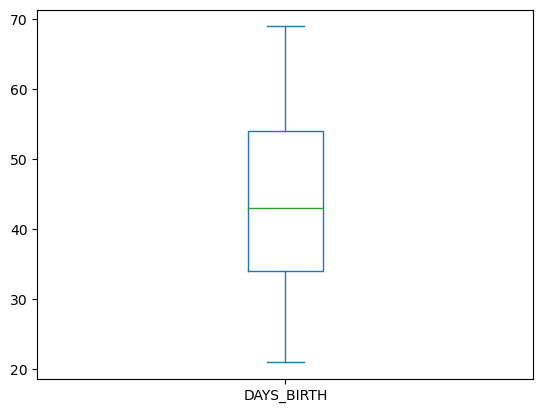

In [68]:
data1['DAYS_BIRTH'].plot.box()

In [69]:
data1['Appl_AGE']=pd.cut(data1['DAYS_BIRTH'], ['20','25','30','35','40','45','50','55','60','70'], labels=['20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y','50Y-55Y','55Y-60Y','60Y+'])

In [70]:
data1['Appl_AGE'].value_counts(normalize=True)*100

35Y-40Y    14.079822
40Y-45Y    13.197902
30Y-35Y    12.836289
45Y-50Y    11.356992
50Y-55Y    11.352439
25Y-30Y    11.269841
55Y-60Y    10.745957
60Y+       10.538810
20Y-25Y     4.621948
Name: Appl_AGE, dtype: float64

In [71]:
data1.groupby(['Appl_AGE','TARGET']).size().reset_index()

Appl_AGE  TARGET      0
0   20Y-25Y       0  12492
1   20Y-25Y       1   1721
2   25Y-30Y       0  30784
3   25Y-30Y       1   3872
4   30Y-35Y       0  35492
5   30Y-35Y       1   3981
6   35Y-40Y       0  39469
7   35Y-40Y       1   3828
8   40Y-45Y       0  37444
9   40Y-45Y       1   3141
10  45Y-50Y       0  32340
11  45Y-50Y       1   2584
12  50Y-55Y       0  32618
13  50Y-55Y       1   2292
14  55Y-60Y       0  31235
15  55Y-60Y       1   1810
16     60Y+       0  30812
17     60Y+       1   1596

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '20Y-25Y'),
  Text(1, 0, '25Y-30Y'),
  Text(2, 0, '30Y-35Y'),
  Text(3, 0, '35Y-40Y'),
  Text(4, 0, '40Y-45Y'),
  Text(5, 0, '45Y-50Y'),
  Text(6, 0, '50Y-55Y'),
  Text(7, 0, '55Y-60Y'),
  Text(8, 0, '60Y+')])

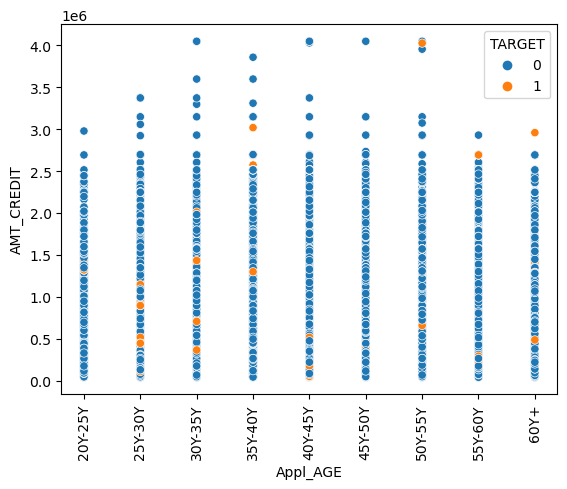

In [72]:
sns.scatterplot(x=data1['Appl_AGE'],y=data1['AMT_CREDIT'],hue=data1['TARGET'])
plt.xticks(rotation=90)

### The age group 20-25 years , 45-50 & 60+ have less defulters

In [73]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

The amount of good price have the outliers, if we see the above the 90 percentaile the value get highly changed.

<Axes: >

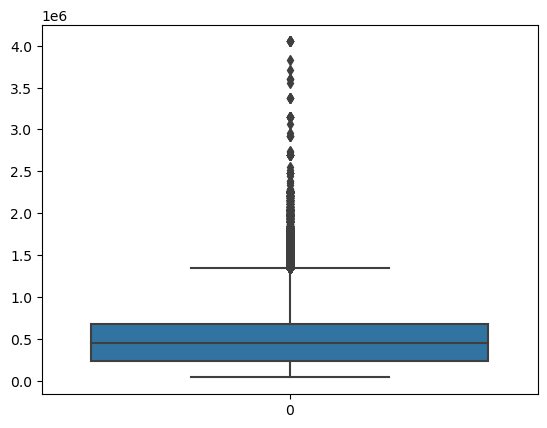

In [74]:
sns.boxplot(data1['AMT_GOODS_PRICE'])

In [75]:
data1['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [76]:
data1['AMT_GOODS_PRICE_RANGE']=pd.cut(data1['AMT_GOODS_PRICE'], [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000], labels=['0-100K','100K-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K','800K-900K','Above 900K'])

In [77]:
data1['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)*100

200K-300K     20.409351
400K-500K     18.617545
Above 900K    13.619025
600K-700K     13.015469
100K-200K     10.717015
800K-900K      6.986417
300K-400K      6.900241
500K-600K      4.265538
0-100K         2.832094
700K-800K      2.637304
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

<Axes: >

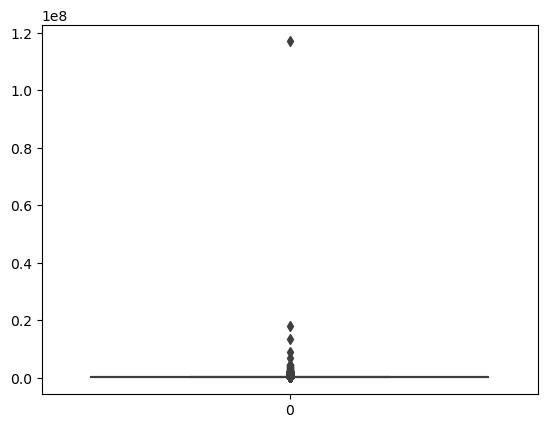

In [78]:
sns.boxplot(data1['AMT_INCOME_TOTAL'])

Generally the customer income is with in 1 million but the amount income have the outliers over the 99% of data.
In this case we can bin the values

In [79]:
data1['AMT_INCOME_TOTAL'].agg(['min','max','median'])

min           25650.0
max       117000000.0
median       147150.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [80]:
data1['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [81]:
data1['AMT_INCOME_TOTAL_RANGE']=pd.cut(data1['AMT_INCOME_TOTAL'], [0,50000,100000,150000,200000,250000,300000,350000,400000,472500], labels=['0-50K','50K-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K','Above 400K'])

In [82]:
data1['AMT_INCOME_TOTAL_RANGE'].value_counts(normalize=True)*100

100K-150K     30.079442
150K-200K     21.119091
50K-100K      19.435659
200K-250K     15.808694
250K-300K      5.595786
300K-350K      2.914314
350K-400K      1.905437
Above 400K     1.658144
0-50K          1.483430
Name: AMT_INCOME_TOTAL_RANGE, dtype: float64

In [83]:
data1['AMT_CREDIT_RANGE']=pd.cut(data1['AMT_CREDIT'], [0,200000,400000,600000,800000,900000,1000000,1854000], labels=['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','Above 1M'])

In [84]:
data1['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200K-400K    26.656177
400K-600K    21.768122
Above 1M     15.408822
600K-800K    14.203971
0-200K       11.872446
800K-900K     7.158155
900K-1M       2.932308
Name: AMT_CREDIT_RANGE, dtype: float64

In [85]:
data1['AMT_ANNUITY_RANGE']=pd.cut(data1['AMT_ANNUITY'], [0,25000,50000,100000,150000,200000,258025], labels=['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K'])

In [86]:
data1['AMT_ANNUITY_RANGE'].value_counts(normalize=True)*100

0-25K         50.365517
25K-50K       42.709180
50K-100K       6.761406
100K-150K      0.142109
Above 200K     0.011382
150K-200K      0.010406
Name: AMT_ANNUITY_RANGE, dtype: float64

In [87]:
data1['DAYS_EMPLOYED']=data1['DAYS_EMPLOYED'].apply(lambda x: round(abs(x)/365))

In [88]:
data1['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10       1.0
0.20       2.0
0.30       3.0
0.40       4.0
0.50       6.0
0.60       8.0
0.70      12.0
0.80      25.0
0.90    1001.0
0.99    1001.0
Name: DAYS_EMPLOYED, dtype: float64

In [89]:
data1['APPL_EXP_RANGE']=pd.cut(data1['DAYS_EMPLOYED'], [0,5,10,15,20,25,30,35,40,45,1001], labels=['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','Above 45Y'])

In [90]:
data1['APPL_EXP_RANGE'].value_counts(normalize=True)*100

0-5Y         45.396109
5Y-10Y       20.185116
Above 45Y    18.601621
10Y-15Y       8.493446
15Y-20Y       3.407790
20Y-25Y       1.955608
25Y-30Y       1.041110
30Y-35Y       0.616606
35Y-40Y       0.239455
40Y-45Y       0.063138
Name: APPL_EXP_RANGE, dtype: float64

In [91]:
data1['DAYS_REGISTRATION']=data1['DAYS_REGISTRATION'].apply(lambda x: round(abs(x)/365))

In [92]:
data1['DAYS_REGISTRATION'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     2.0
0.20     4.0
0.30     7.0
0.40    10.0
0.50    12.0
0.60    15.0
0.70    19.0
0.80    23.0
0.90    27.0
0.99    38.0
Name: DAYS_REGISTRATION, dtype: float64

In [93]:
data1['DAYS_REGISTRATION_RANGE']=pd.cut(data1['DAYS_REGISTRATION'], [0,5,10,15,20,25,30,35,40,70], labels=['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','Above 40Y'])

In [94]:
data1['DAYS_REGISTRATION_RANGE'].value_counts(normalize=True)*100

0-5Y         22.715609
10Y-15Y      19.463726
5Y-10Y       18.247997
15Y-20Y      13.839681
20Y-25Y      12.023289
25Y-30Y       7.838421
30Y-35Y       3.757739
35Y-40Y       1.619409
Above 40Y     0.494131
Name: DAYS_REGISTRATION_RANGE, dtype: float64

In [95]:
data1['DAYS_ID_PUBLISH']=data1['DAYS_ID_PUBLISH'].apply(lambda x: round(abs(x)/365))

In [96]:
data1['DAYS_ID_PUBLISH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     2.0
0.20     4.0
0.30     6.0
0.40     7.0
0.50     9.0
0.60    11.0
0.70    11.0
0.80    12.0
0.90    13.0
0.99    15.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [97]:
data1['DAYS_ID_PUBLISH_RANGE']=pd.cut(data1['DAYS_ID_PUBLISH'], [0,5,10,15,20], labels=['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y'])

In [98]:
data1['DAYS_ID_PUBLISH_RANGE'].value_counts(normalize=True)*100

10Y-15Y    41.303854
5Y-10Y     30.575338
0-5Y       27.590522
15Y-20Y     0.530285
Name: DAYS_ID_PUBLISH_RANGE, dtype: float64

In [99]:
data1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64


In [100]:
data1.shape

(307511, 49)

## Univariative analsis

In [101]:
data1.select_dtypes(include =['object']).columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [102]:
cat_columns=data1.select_dtypes(include =['object']).columns.tolist()

In [103]:
cat_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

We can plot the bar graph for the value counts of the each category. Also the next segment will analyse with the target variable

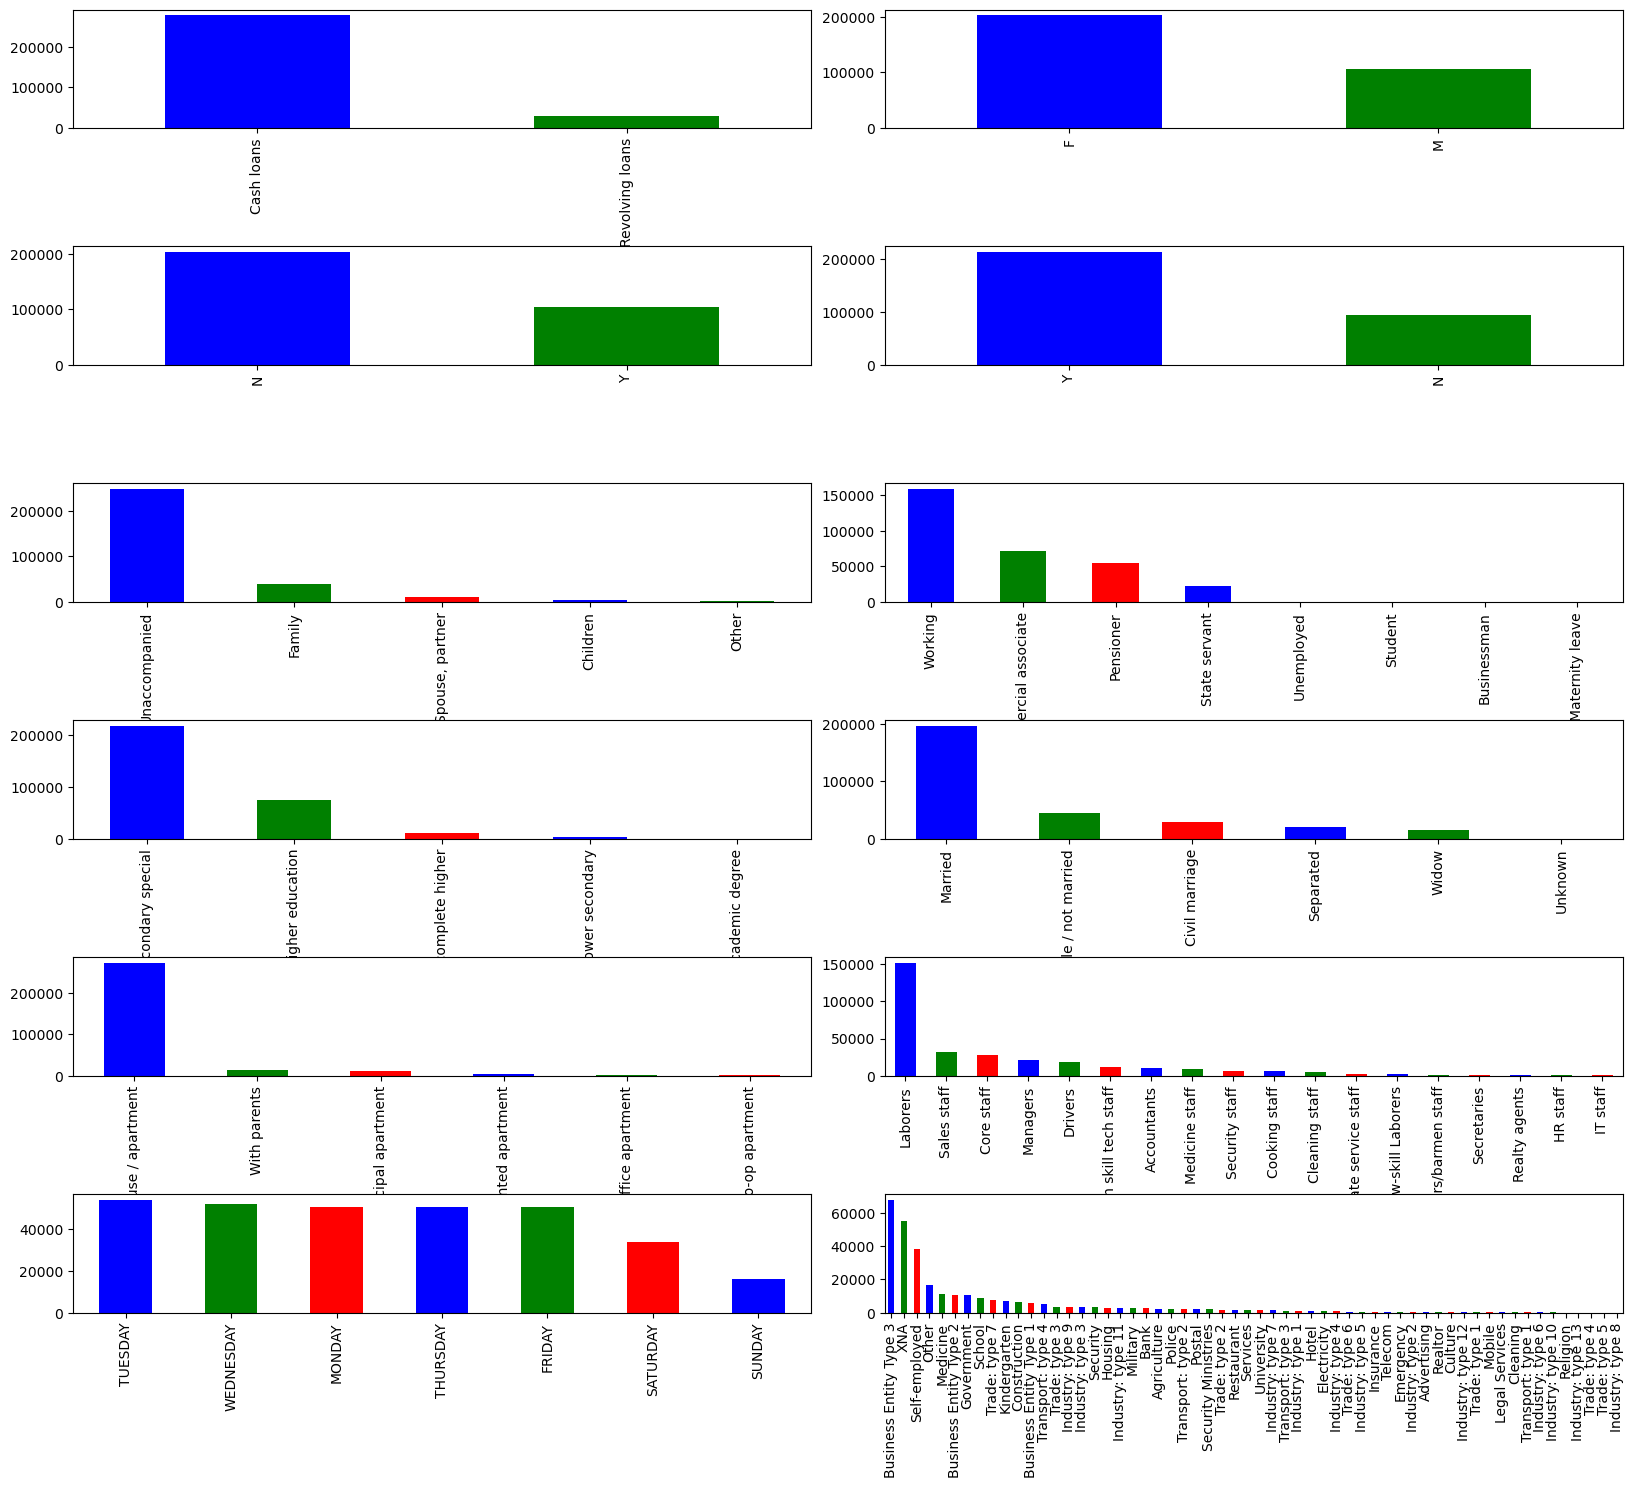

In [104]:
plt.figure(figsize=(20,20))
for i,cat in enumerate(cat_columns):
    plt.subplot(7,2,i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    data1[cat].value_counts().plot.bar(color=['blue','green','red'])
    plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '20Y-25Y'),
  Text(1, 0, '25Y-30Y'),
  Text(2, 0, '30Y-35Y'),
  Text(3, 0, '35Y-40Y'),
  Text(4, 0, '40Y-45Y'),
  Text(5, 0, '45Y-50Y'),
  Text(6, 0, '50Y-55Y'),
  Text(7, 0, '55Y-60Y'),
  Text(8, 0, '60Y+')])

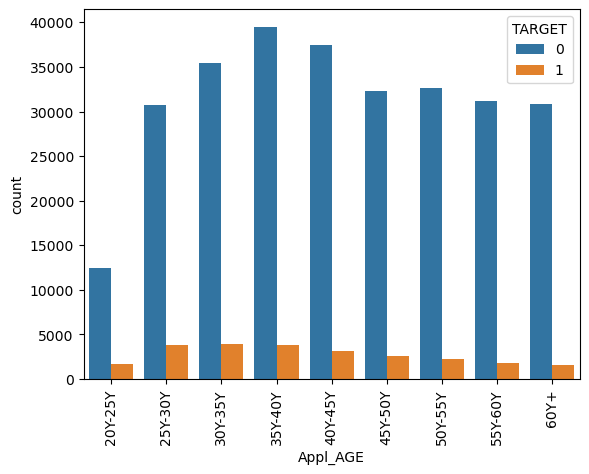

In [105]:
sns.countplot(data=data1,x ='Appl_AGE',hue='TARGET')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0-5Y'),
  Text(1, 0, '5Y-10Y'),
  Text(2, 0, '10Y-15Y'),
  Text(3, 0, '15Y-20Y'),
  Text(4, 0, '20Y-25Y'),
  Text(5, 0, '25Y-30Y'),
  Text(6, 0, '30Y-35Y'),
  Text(7, 0, '35Y-40Y'),
  Text(8, 0, '40Y-45Y'),
  Text(9, 0, 'Above 45Y')])

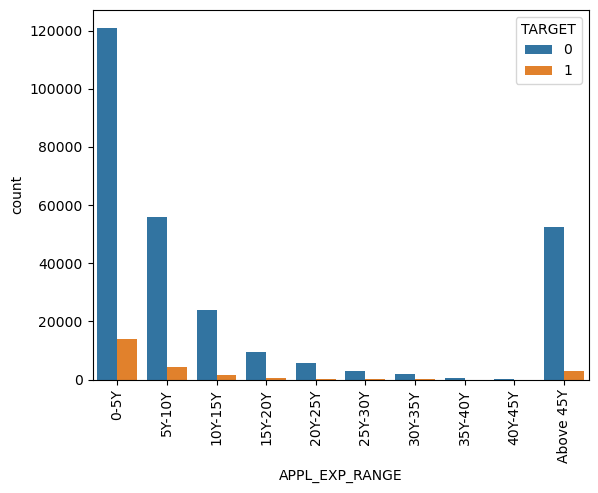

In [106]:
sns.countplot(data=data1,x ='APPL_EXP_RANGE',hue='TARGET')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0-5Y'),
  Text(1, 0, '5Y-10Y'),
  Text(2, 0, '10Y-15Y'),
  Text(3, 0, '15Y-20Y')])

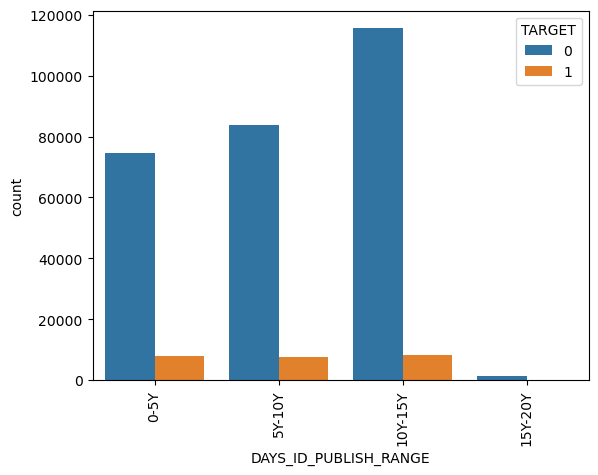

In [107]:
sns.countplot(data=data1,x ='DAYS_ID_PUBLISH_RANGE',hue='TARGET')
plt.xticks(rotation=90)

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

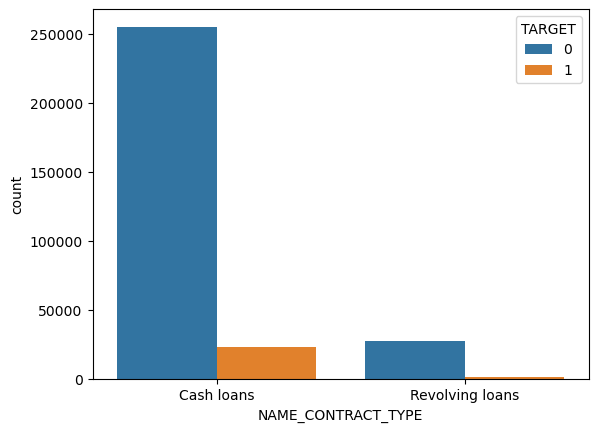

In [108]:
sns.countplot(data=data1, x='NAME_CONTRACT_TYPE',hue='TARGET')

<Axes: xlabel='NAME_CONTRACT_TYPE'>

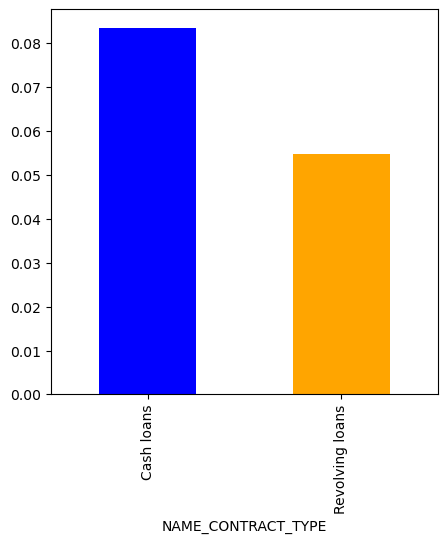

In [109]:
plt.figure(figsize=(5,5))

data1.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().plot.bar(color=['blue','orange'])

<Axes: xlabel='NAME_CONTRACT_TYPE'>

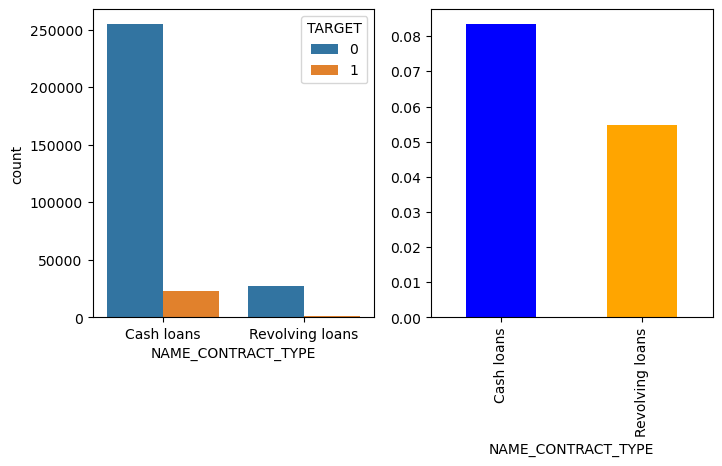

In [110]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(data=data1, x='NAME_CONTRACT_TYPE',hue='TARGET')
plt.subplot(1,2,2)
data1.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().plot.bar(color=['blue','orange'])

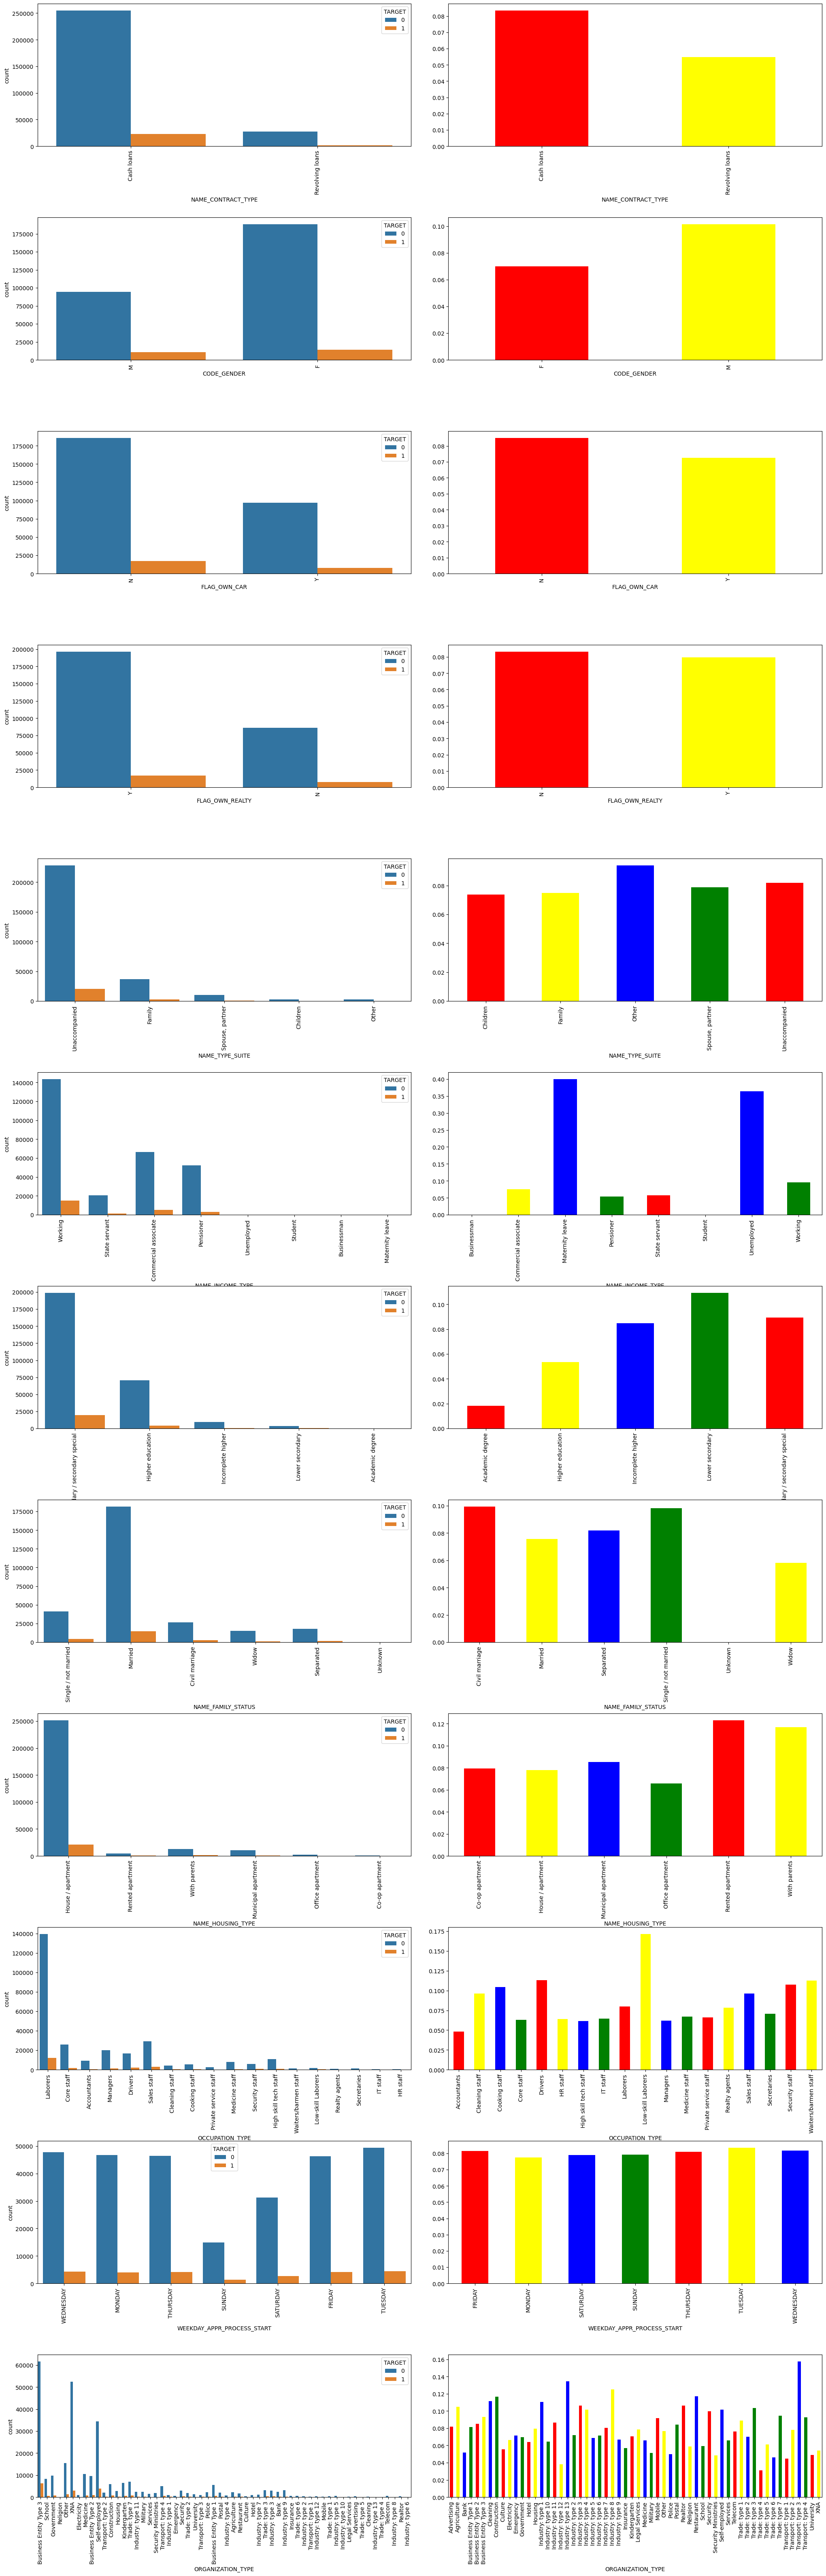

In [111]:
plt.figure(figsize=(25,80))

for i,cat in enumerate(cat_columns):
    plt.subplot(12,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    sns.countplot(data=data1, x=cat,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(12,2,i+i+2)
    data1.groupby(cat)['TARGET'].mean().plot.bar(color=['red','yellow','blue','green'])
    plt.xticks(rotation=90)

In [112]:
data1.dtypes.value_counts()

int64       16
float64     13
object      12
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [113]:
num_col=data1.select_dtypes(include=['int64','float64']).columns.tolist()
num_cat_col=data1.select_dtypes(include=['int64','float64','category']).columns.tolist()

In [114]:
num_col

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [115]:
num_data=data1[num_col]

In [116]:
num_data.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801          26   
1      35698.5        1129500.0                    0.003541          46   
2       6750.0         135000.0                    0.010032          52   
3      29686.5         297000.0                    0.008019          52   
4      21865.5         513000.0                    0.028663          55   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0              2                 10                6              1.0   
1              3                  3                1              2.0   
2              1                 12                7              1.0   
3              8                 27                7              2.0   
4              8                 12                9              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  DAYS_LAST_PHONE_CHANGE  \
0                       0                        0                 -1134.0   
1                       0                        0                  -828.0   
2                       0                        0                  -815.0   
3                       0                        0                  -617.0   
4                       1                        1                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         1.0  
4        

In [117]:
data1.drop(['DAYS_BIRTH','DAYS_EMPLOYED','AMT_INCOME_TOTAL'], axis=1, inplace= True)

In [118]:
list_numerical =[]
for i in data1.columns:
    if data1[i].dtype == 'int64' or 'float64':
        list_numerical.append(i)

In [119]:
list_numerical.remove('SK_ID_CURR')

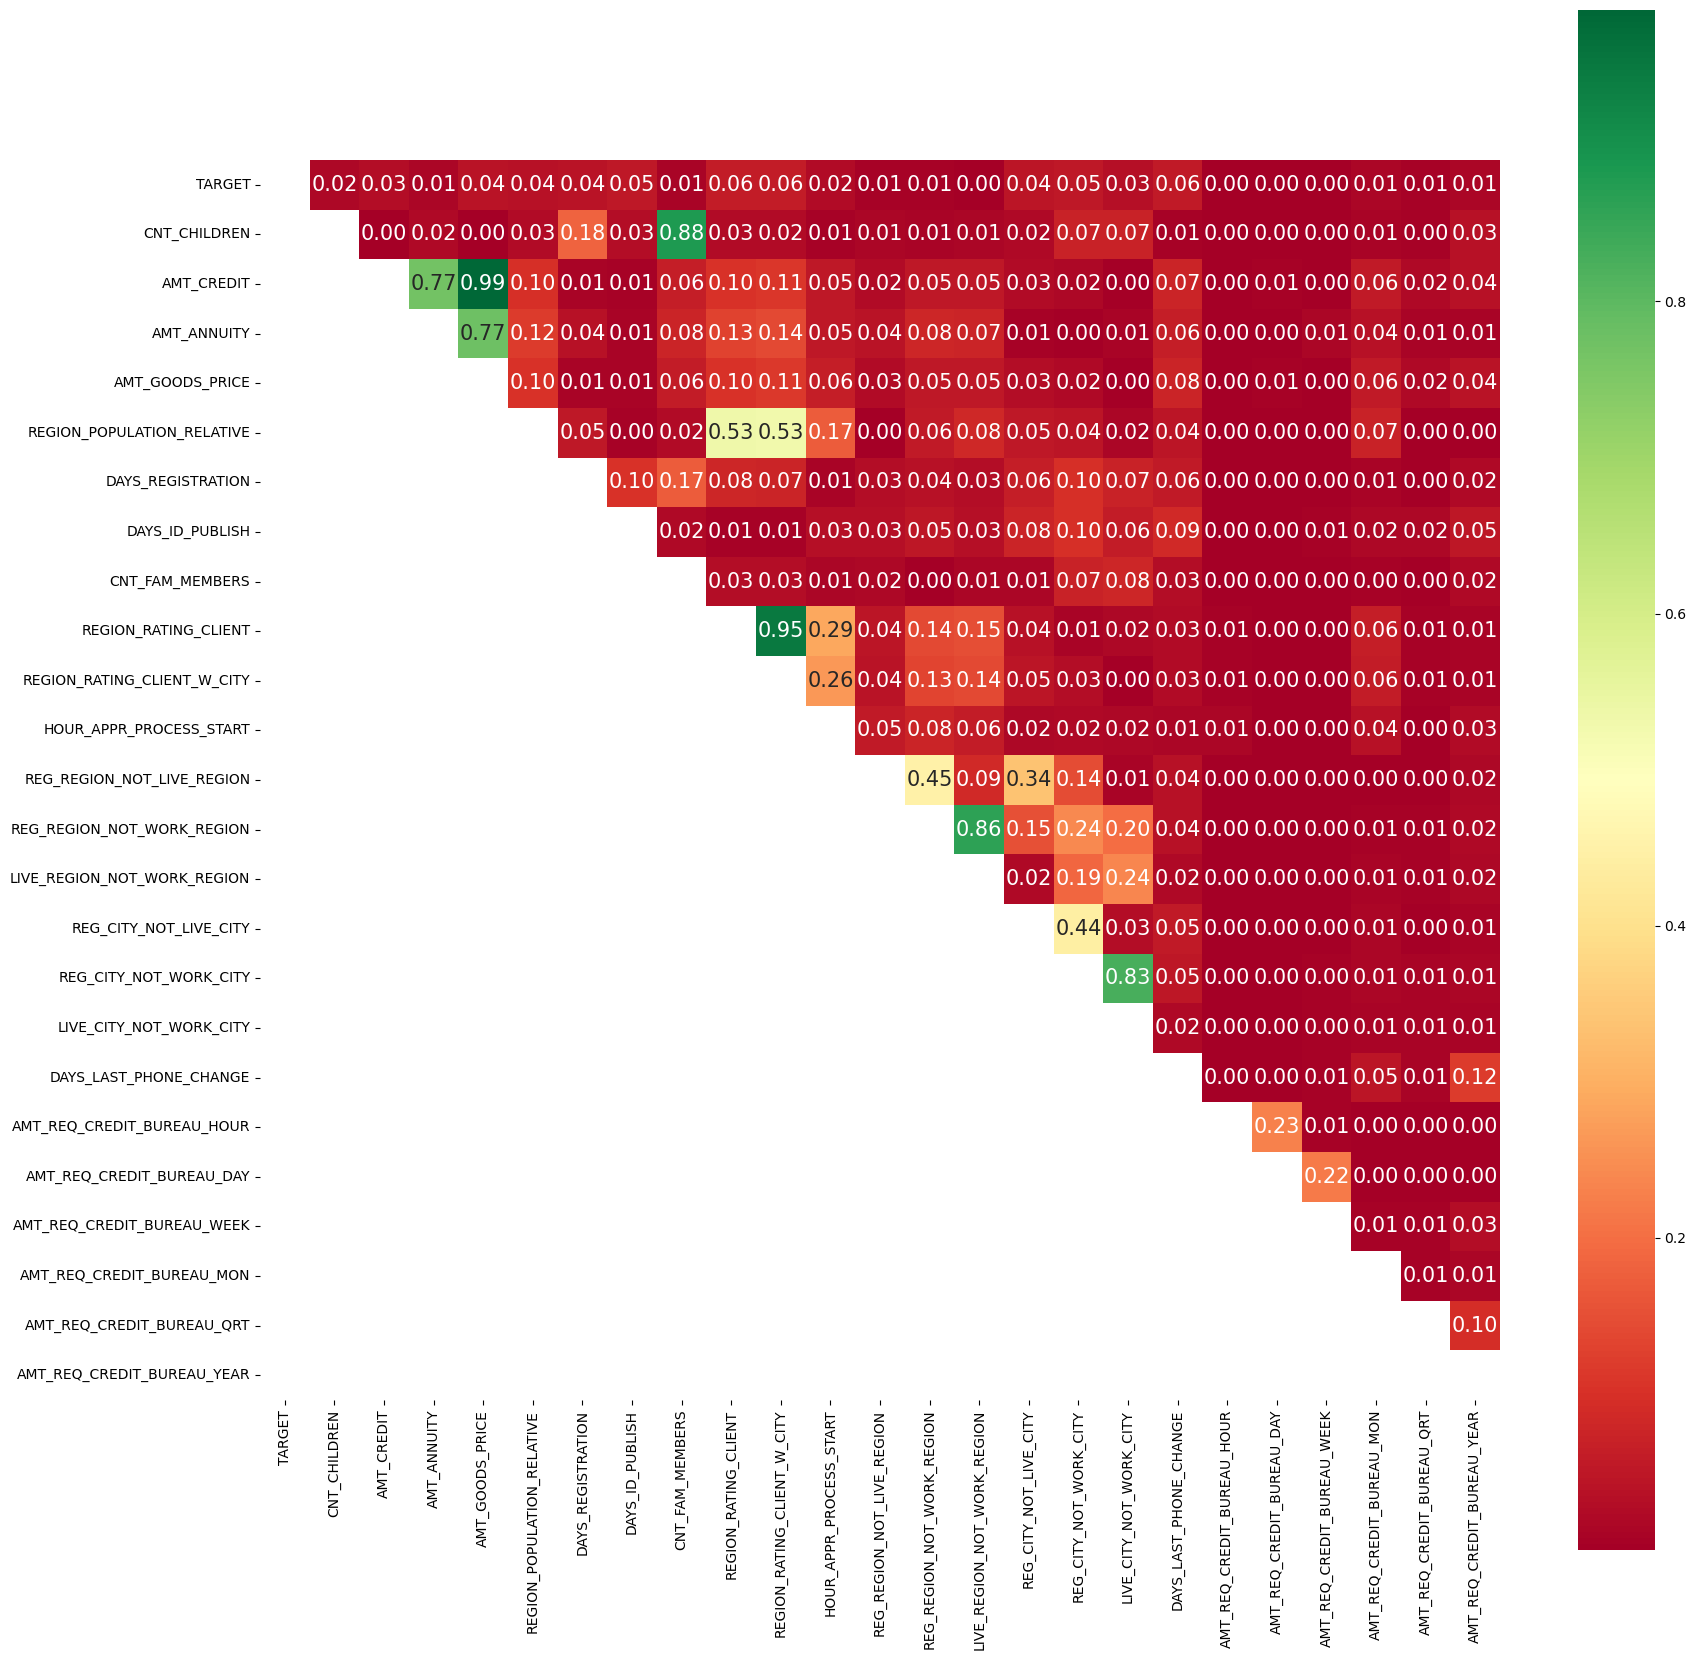

In [123]:
# check correlation of continuous vars with target

# Finding out the correlation between the features
list_numerical_corr = data1[list_numerical].corr().abs()

# Select upper triangle of correlation matrix
upper = list_numerical_corr.where(np.triu(np.ones(list_numerical_corr.shape), k=1).astype(bool))

# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(upper, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='RdYlGn')


# Find features with correlation greater than 0.7
high_corr_columns = [column for column in upper.columns if any(upper[column] > 0.7)]


In [124]:
print(high_corr_columns)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY']


In [125]:
### the list of coloumns are highlighly co related with other numerical columns

list_remove= ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY']

In [126]:
data1.drop(list_remove, axis=1, inplace= True)

In [127]:
non_defualter=num_data[num_data['TARGET']==0]
defaulter= num_data[num_data['TARGET']==1]

In [128]:
amount_num_col=num_data[['AMT_CREDIT','AMT_ANNUITY','TARGET']]

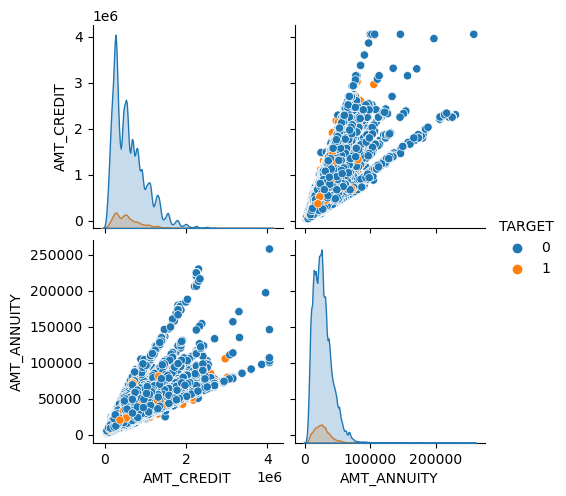

In [129]:
sns.pairplot(data=amount_num_col,hue='TARGET')

In [130]:
data1.ORGANIZATION_TYPE.replace('XNA', 'Pensioner', inplace= True)

In [131]:
data1.ORGANIZATION_TYPE= data1.ORGANIZATION_TYPE.replace(['Business Entity Type 3','Business Entity Type 2', 'Business Entity Type 1'],'Business Entity')
data1.ORGANIZATION_TYPE= data1.ORGANIZATION_TYPE.replace(['Business Entity Type 3','Business Entity Type 2', 'Business Entity Type 1'],'Business Entity')
data1.ORGANIZATION_TYPE= data1.ORGANIZATION_TYPE.replace(['Trade: type 1','Trade: type 2','Trade: type 3','Trade: type 4','Trade: type 5',
                                                       'Trade: type 6','Trade: type 7','Trade: type 8','Trade: type 9','Trade: type 10',
                                                       'Trade: type 11','Trade: type 12','Trade: type 13','Trade: type 14'], 'Trade')
data1.ORGANIZATION_TYPE= data1.ORGANIZATION_TYPE.replace(['Industry: type 1','Industry: type 2','Industry: type 3','Industry: type 4',
                                                        'Industry: type 5','Industry: type 6','Industry: type 7','Industry: type 8',
                                                        'Industry: type 9','Industry: type 10','Industry: type 11','Industry: type 12',
                                                        'Industry: type 13'],"Industry")
data1.ORGANIZATION_TYPE= data1.ORGANIZATION_TYPE.replace(['Transport: type 1','Transport: type 2','Transport: type 3','Transport: type 4'],
                                                       "Transport")

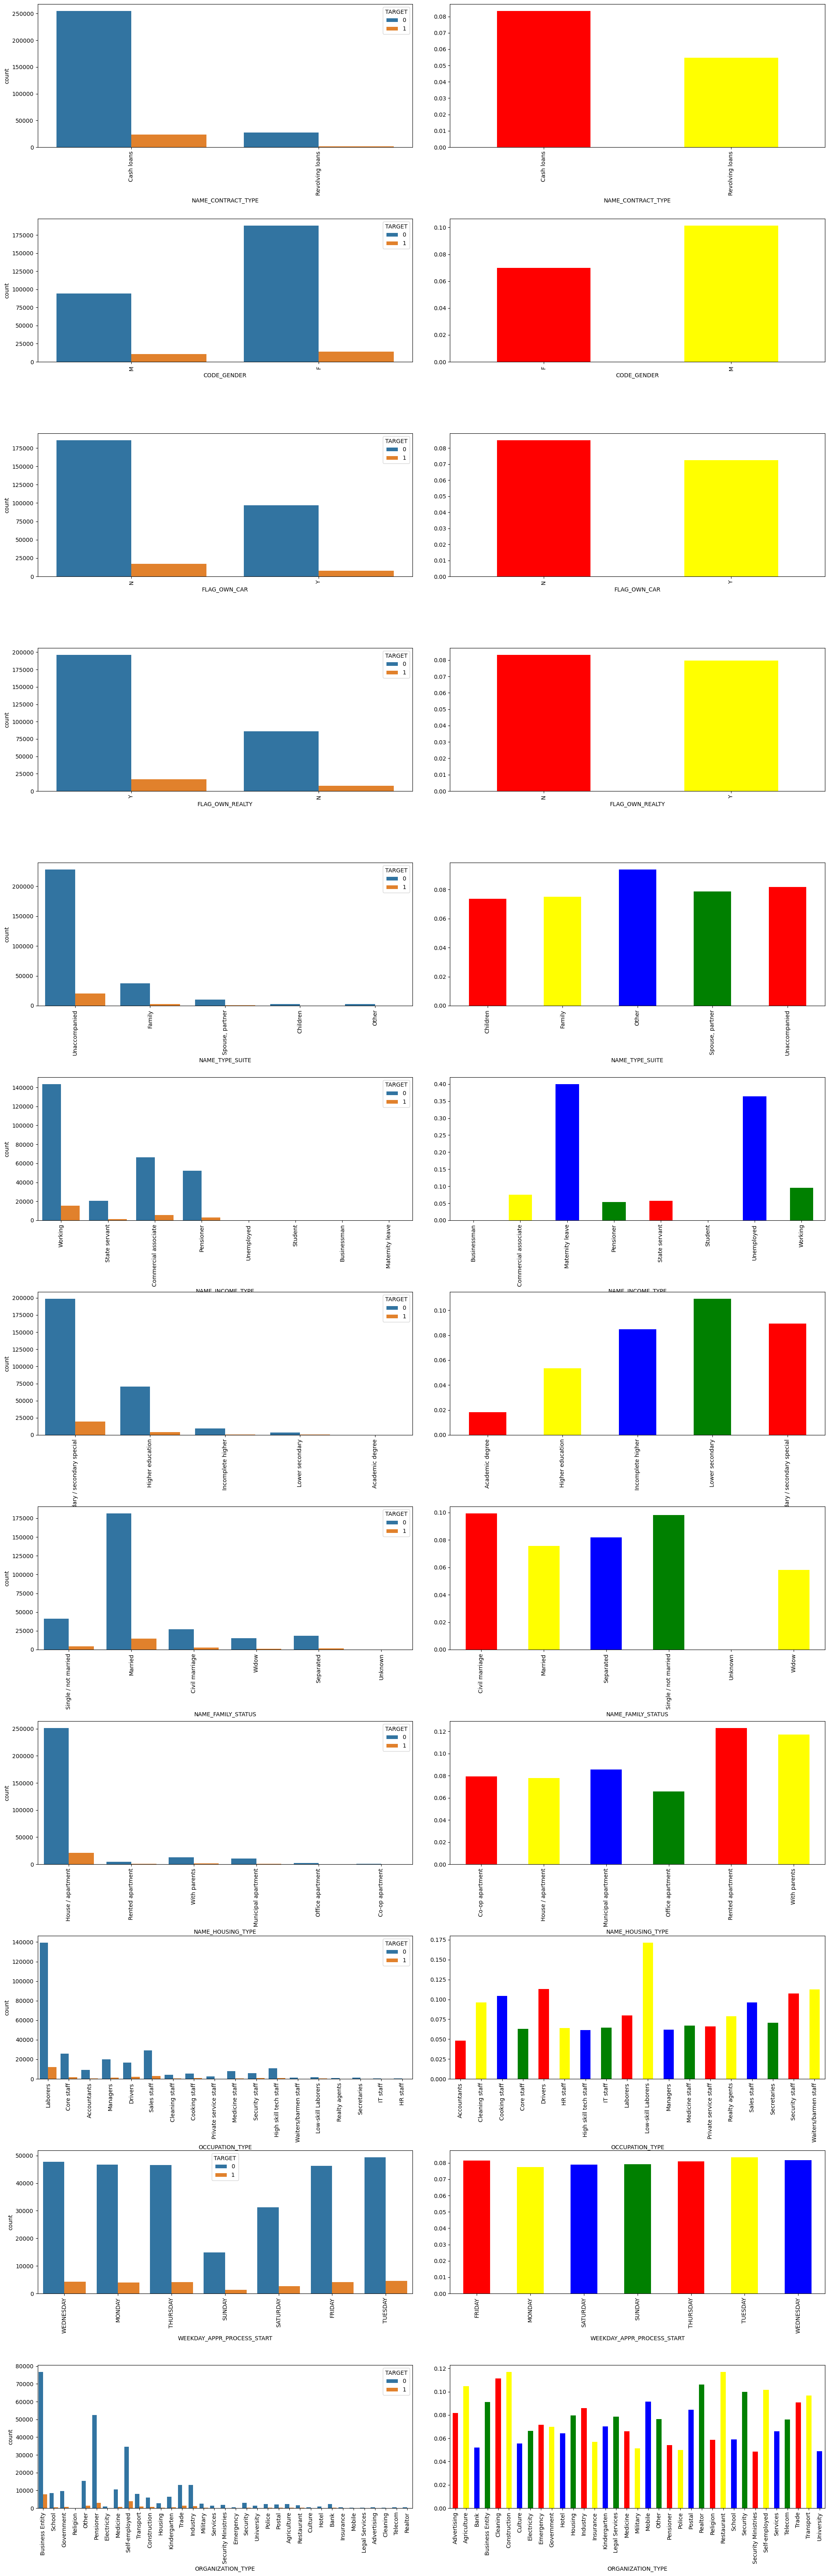

In [132]:
plt.figure(figsize=(25,80))

for i,cat in enumerate(cat_columns):
    plt.subplot(12,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    sns.countplot(data=data1, x=cat,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(12,2,i+i+2)
    data1.groupby(cat)['TARGET'].mean().plot.bar(color=['red','yellow','blue','green'])
    plt.xticks(rotation=90)

In [133]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  int64   
 2   NAME_CONTRACT_TYPE          307511 non-null  object  
 3   CODE_GENDER                 307511 non-null  object  
 4   FLAG_OWN_CAR                307511 non-null  object  
 5   FLAG_OWN_REALTY             307511 non-null  object  
 6   CNT_CHILDREN                307511 non-null  int64   
 7   AMT_CREDIT                  307511 non-null  float64 
 8   NAME_TYPE_SUITE             306219 non-null  object  
 9   NAME_INCOME_TYPE            307511 non-null  object  
 10  NAME_EDUCATION_TYPE         307511 non-null  object  
 11  NAME_FAMILY_STATUS          307511 non-null  object  
 12  NAME_HOUSING_TYPE           307511 non-null  object  
 13 

In [134]:
data1.shape

(307511, 40)

In [135]:
list_obj =[]
for i in data1.columns:
    if data1[i].dtype == 'object':
        list_obj.append(i)

In [136]:
list_obj

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [137]:
print('Before obj we have {} features'.format(data1.shape[1]))
data1_obj = pd.get_dummies(data1, columns=list_obj, drop_first=True)
print('After obj we have {} features'.format(data1_obj.shape[1]))

Before obj we have 40 features
After obj we have 114 features


In [138]:
list_cate =[]
for i in data1.columns:
    if data1[i].dtype == 'category':
        list_cate.append(i)

In [139]:
list_cate

['Appl_AGE',
 'AMT_GOODS_PRICE_RANGE',
 'AMT_INCOME_TOTAL_RANGE',
 'AMT_CREDIT_RANGE',
 'AMT_ANNUITY_RANGE',
 'APPL_EXP_RANGE',
 'DAYS_REGISTRATION_RANGE',
 'DAYS_ID_PUBLISH_RANGE']

In [140]:
#print('Before cate we have {} features'.format(data1.shape[1]))
data1_obj = pd.get_dummies(data1_obj, columns=['Appl_AGE','APPL_EXP_RANGE','AMT_INCOME_TOTAL_RANGE','DAYS_REGISTRATION_RANGE'], drop_first=True)
#print('After cate we have {} features'.format(data1_cate.shape[1]))

In [142]:
data1_obj.shape

(307511, 143)

In [143]:
list_numerical =[]
for i in data1_obj.columns:
    if data1_obj[i].dtype == 'uint8':
        list_numerical.append(i)

In [144]:
len(list_numerical)

119

In [145]:
pd.set_option('display.max_columns', 150)

In [146]:
# Create correlation matrix
list_numerical_corr = data1_obj[list_numerical].corr().abs()

# Select upper triangle of correlation matrix
upper = list_numerical_corr.where(np.triu(np.ones(list_numerical_corr.shape), k=1).astype(bool))

plt.figure(figsize=(100,100))
sns.heatmap(upper, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='RdYlGn')

# Find features with correlation greater than 0.7
high_corr_columns = [column for column in upper.columns if any(upper[column] > 0.7)]


In [147]:
print(high_corr_columns)

['NAME_TYPE_SUITE_Unaccompanied', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'ORGANIZATION_TYPE_Pensioner', 'APPL_EXP_RANGE_Above 45Y']


In [148]:
list_numerical_corr[high_corr_columns]

NAME_TYPE_SUITE_Unaccompanied  \
NAME_CONTRACT_TYPE_Revolving loans                                      0.009065   
CODE_GENDER_M                                                           0.007747   
FLAG_OWN_CAR_Y                                                          0.009131   
FLAG_OWN_REALTY_Y                                                       0.048999   
NAME_TYPE_SUITE_Family                                                  0.795431   
NAME_TYPE_SUITE_Other                                                   0.200526   
NAME_TYPE_SUITE_Spouse, partner                                         0.402204   
NAME_TYPE_SUITE_Unaccompanied                                           1.000000   
NAME_INCOME_TYPE_Commercial associate                                   0.015733   
NAME_INCOME_TYPE_Maternity leave                                        0.002132   
NAME_INCOME_TYPE_Pensioner                                              0.026866   
NAME_INCOME_TYPE_State servant                                          0.001550   
NAME_INCOME_TYPE_Student                                                0.000591   
NAME_INCOME_TYPE_Unemployed                                             0.004121   
NAME_INCOME_TYPE_Working                                                0.008084   
NAME_EDUCATION_TYPE_Higher education                                    0.035811   
NAME_EDUCATION_TYPE_Incomplete higher                                   0.015545   
NAME_EDUCATION_TYPE_Lower secondary                                     0.007016   
NAME_EDUCATION_TYPE_Secondary / secondary special                       0.038513   
NAME_FAMILY_STATUS_Married                                              0.080925   
NAME_FAMILY_STATUS_Separated                                            0.045668   
NAME_FAMILY_STATUS_Single / not married                                 0.065208   
NAME_FAMILY_STATUS_Unknown                                              0.005235   
NAME_FAMILY_STATUS_Widow                                                0.018617   
NAME_HOUSING_TYPE_House / apartment                                     0.030590   
NAME_HOUSING_TYPE_Municipal apartment                                   0.014695   
NAME_HOUSING_TYPE_Office apartment                                      0.006831   
NAME_HOUSING_TYPE_Rented apartment                                      0.011317   
NAME_HOUSING_TYPE_With parents                                          0.022141   
OCCUPATION_TYPE_Cleaning staff                                          0.004162   
OCCUPATION_TYPE_Cooking staff                                           0.005486   
OCCUPATION_TYPE_Core staff                                              0.006341   
OCCUPATION_TYPE_Drivers                                                 0.000162   
OCCUPATION_TYPE_HR staff                                                0.000002   
OCCUPATION_TYPE_High skill tech staff                                   0.008525   
OCCUPATION_TYPE_IT staff                                                0.002777   
OCCUPATION_TYPE_Laborers                                                0.021945   
OCCUPATION_TYPE_Low-skill Laborers                                      0.000254   
OCCUPATION_TYPE_Managers                                                0.024075   
OCCUPATION_TYPE_Medicine staff                                          0.001985   
OCCUPATION_TYPE_Private service staff                                   0.001044   
OCCUPATION_TYPE_Realty agents                                           0.002853   
OCCUPATION_TYPE_Sales staff                                             0.002286   
OCCUPATION_TYPE_Secretaries                                             0.001692   
OCCUPATION_TYPE_Security staff                                          0.005921   
OCCUPATION_TYPE_Waiters/barmen staff                                    0.002946   
WEEKDAY_APPR_PROCESS_START_MONDAY                                       0.004889   
WEEKDAY_APPR_PROCES

In [149]:
# Drop features 
data1_obj.drop(high_corr_columns, axis=1, inplace= True)

In [150]:
data1_obj.shape

(307511, 139)

In [151]:
bureau.shape

(1716428, 17)

In [152]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [153]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [154]:
ohe_cols = ['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']

In [155]:
bureau.CREDIT_ACTIVE.value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

<Axes: >

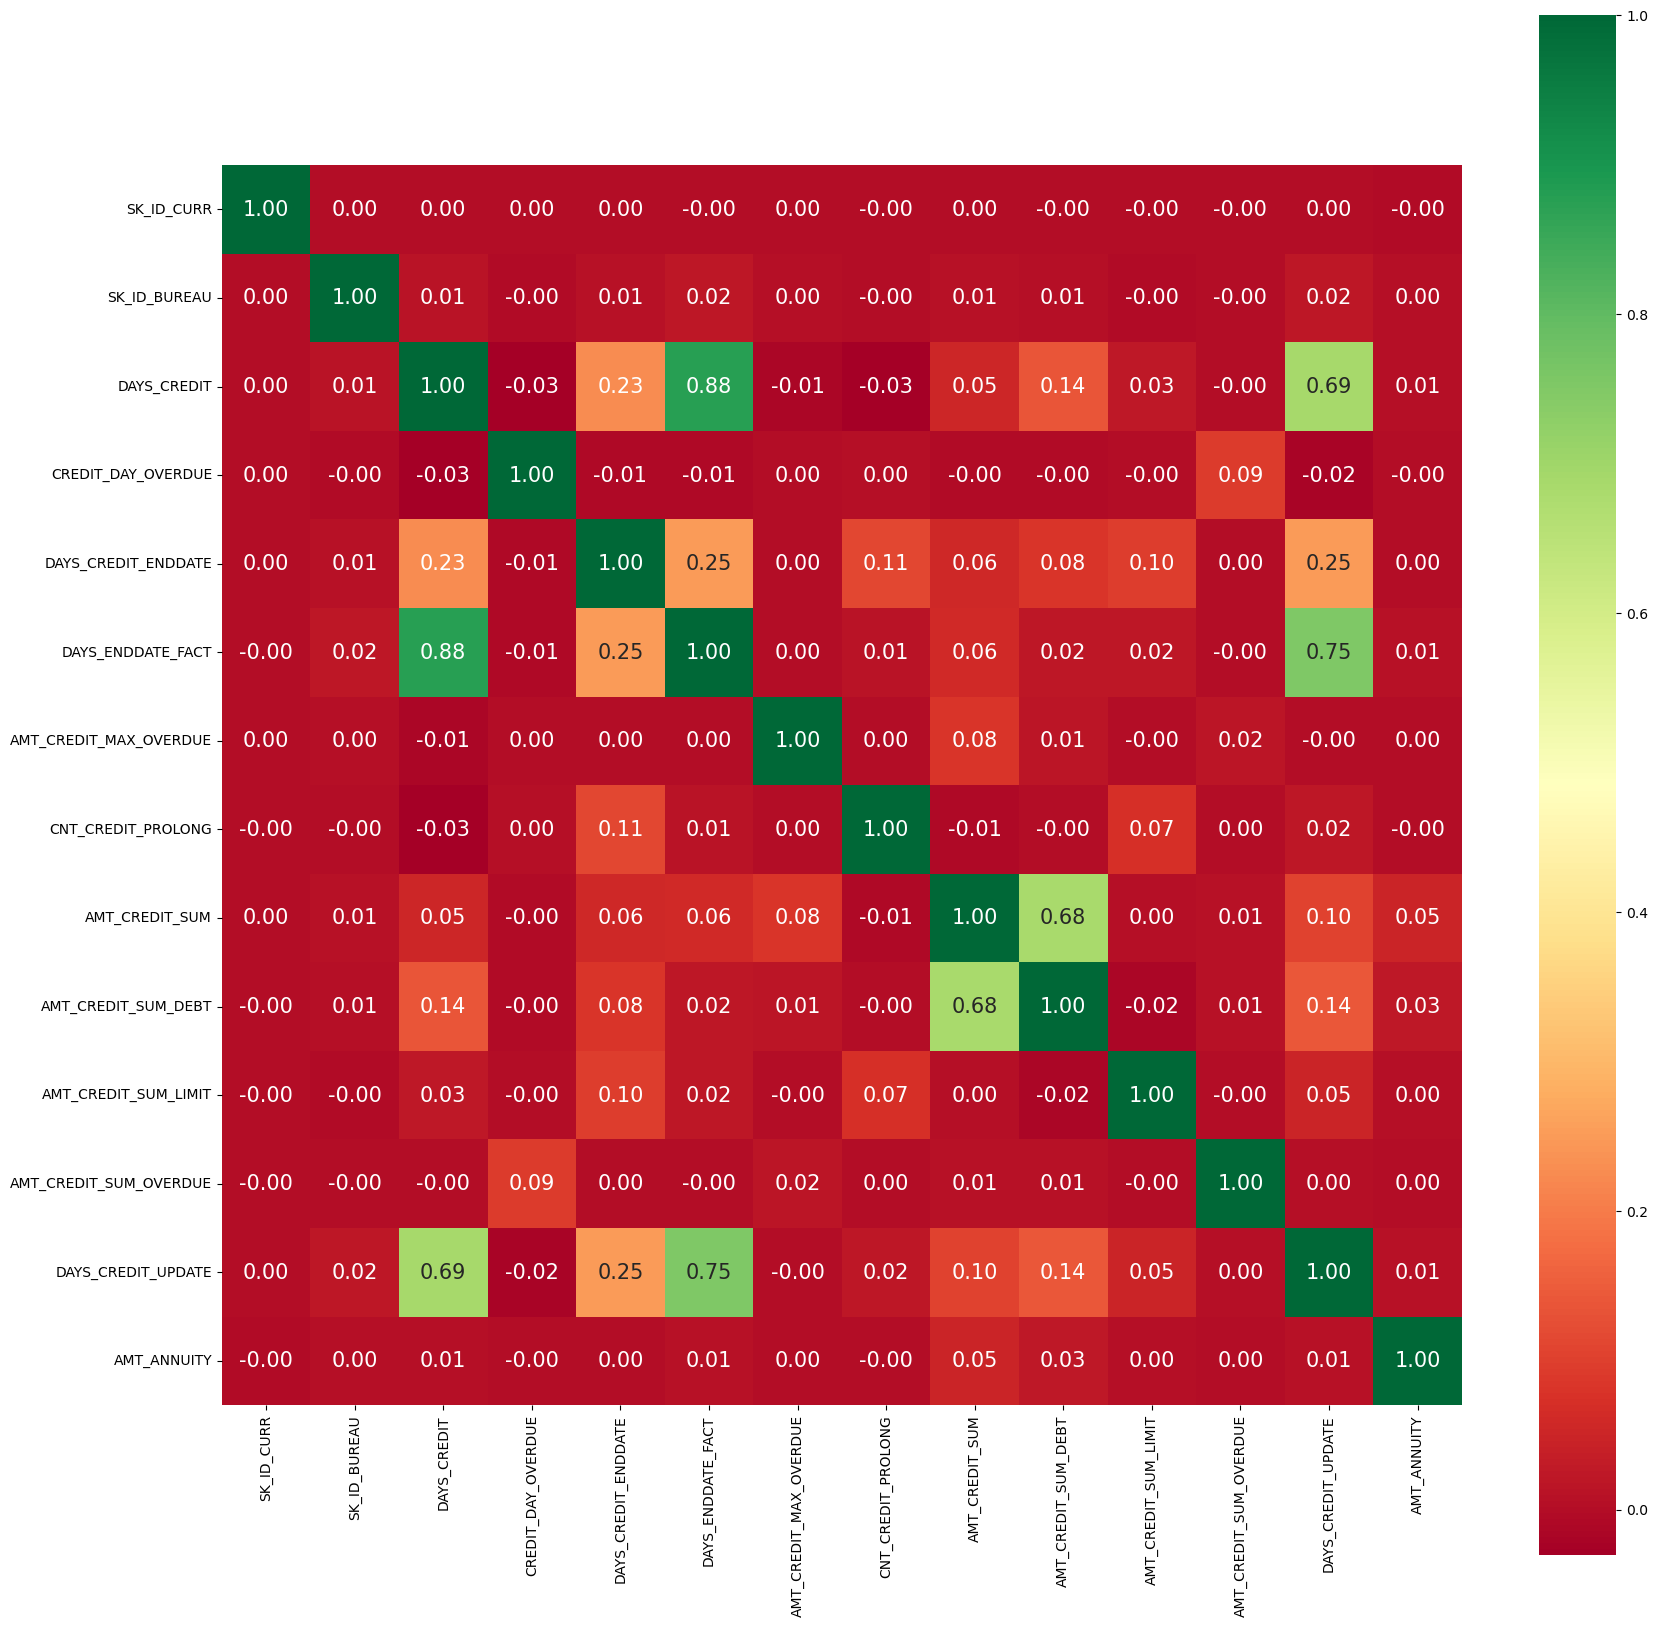

In [156]:
# Finding out the correlation between the features
bureau_corr = bureau.corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(bureau_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='RdYlGn')

In [157]:
upper = bureau_corr.where(np.triu(np.ones(bureau_corr.shape), k=1).astype(bool))
high_corr_columns = [column for column in upper.columns if any(upper[column] > 0.6)]

In [158]:
high_corr_columns

['DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_UPDATE']

In [159]:
bureau.drop(high_corr_columns, axis=1, inplace=True)

In [160]:
print('Before ohe we have {} features in train'.format(bureau.shape[1]))
bureau_ohe = pd.get_dummies(bureau, columns=ohe_cols, drop_first=True)
print('After ohe we have {} features in train'.format(bureau_ohe.shape[1]))

Before ohe we have 14 features in train
After ohe we have 31 features in train


In [161]:
bureau_ohe.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'AMT_ANNUITY', 'CREDIT_ACTIVE_Bad debt', 'CREDIT_ACTIVE_Closed',
       'CREDIT_ACTIVE_Sold', 'CREDIT_CURRENCY_currency 2',
       'CREDIT_CURRENCY_currency 3', 'CREDIT_CURRENCY_currency 4',
       'CREDIT_TYPE_Car loan', 'CREDIT_TYPE_Cash loan (non-earmarked)',
       'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Credit card',
       'CREDIT_TYPE_Interbank credit',
       'CREDIT_TYPE_Loan for business development',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Loan for the purchase of equipment',
       'CREDIT_TYPE_Loan for working capital replenishment',
       'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mobile operator loan',
       'CREDIT_TYPE_Mortgage', 'CREDIT_TYPE_Real estate loan',
       'CREDIT_TYPE_Unknown typ

In [162]:
df_bureau_agg = bureau_ohe.drop(columns=['SK_ID_BUREAU']).groupby(['SK_ID_CURR'], as_index=False).agg(['count','mean','median','min','max','sum']).reset_index()
df_bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                                        \
                   count         mean  median   min  max   sum   
0     100001           7  -735.000000  -857.0 -1572  -49 -5145   
1     100002           8  -874.000000 -1042.5 -1437 -103 -6992   
2     100003           4 -1400.750000 -1205.5 -2586 -606 -5603   
3     100004           2  -867.000000  -867.0 -1326 -408 -1734   
4     100005           3  -190.666667  -137.0  -373  -62  -572   

  CREDIT_DAY_OVERDUE                         DAYS_CREDIT_ENDDATE              \
               count mean median min max sum               count        mean   
0                  7  0.0    0.0   0   0   0                   7   82.428571   
1                  8  0.0    0.0   0   0   0                   6 -349.000000   
2                  4  0.0    0.0   0   0   0                   4 -544.500000   
3                  2  0.0    0.0   0   0   0                   2 -488.500000   
4                  3  0.0    0.0   0   0   0                   3  439.333333   

                                 AMT_CREDIT_MAX_OVERDUE                        \
  median     min     max     sum                  count      mean median  min   
0 -179.0 -1329.0  1778.0   577.0                      0       NaN    NaN  NaN   
1 -424.5 -1072.0   780.0 -2094.0                      5  1681.029   40.5  0.0   
2 -480.0 -2434.0  1216.0 -2178.0                      4     0.000    0.0  0.0   
3 -488.5  -595.0  -382.0  -977.0                      1     0.000    0.0  0.0   
4  122.0  -128.0  1324.0  1318.0                      1     0.000    0.0  0.0   

                      CNT_CREDIT_PROLONG                          \
        max       sum              count mean median min max sum   
0       NaN     0.000                  7  0.0    0.0   0   0   0   
1  5043.645  8405.145                  8  0.0    0.0   0   0   0   
2     0.000     0.000                  4  0.0    0.0   0   0   0   
3     0.000     0.000                  2  0.0    0.0   0   0   0   
4     0.000     0.000                  3  0.0    0.0   0   0   0   

  AMT_CREDIT_SUM                                                            \
           count           mean     median      min       max          sum   
0              7  207623.571429  168345.00  85500.0  378000.0  1453365.000   
1              8  108131.945625   54130.50      0.0  450000.0   865055.565   
2              4  254350.125000   92576.25  22248.0  810000.0  1017400.500   
3              2   94518.900000   94518.90  94500.0   94537.8   189037.800   
4              3  219042.000000   58500.00  29826.0  568800.0   657126.000   

  AMT_CREDIT_SUM_LIMIT                                                    \
                 count          mean median  min         max         sum   
0                    6       0.00000    0.0  0.0       0.000       0.000   
1                    4    7997.14125    0.0  0.0   31988.565   31988.565   
2                    4  202500.00000    0.0  0.0  810000.000  810000.000   
3                    2       0.00000    0.0  0.0       0.000       0.000   
4                    3       0.00000    0.0  0.0       0.000       0.000   

  AMT_CREDIT_SUM_OVERDUE                            AMT_ANNUITY               \
                   count mean median  min  max  sum       count         mean   
0                      7  0.0    0.0  0.0  0.0  0.0           7  3545.357143   
1                      8  0.0    0.0  0.0  0.0  0.0           7     0.000000   
2                      4  0.0    0.0  0.0  0.0  0.0           0          NaN   
3                      2  0.0    0.0  0.0  0.0  0.0           0          NaN   
4                      3  0.0    0.0  0.0  0.0  0.0           3  1420.500000   

                                CREDIT_ACTIVE_Bad debt                      \
  median  min      max      sum                  count mean median min max   
0    0.0  0.0  10822.5  24817.5                      7  0.0    0.0   0   0   
1    0.0  0.0      0.0      0.0                      8  0.

In [163]:
df_bureau_agg.xs(('mean'), level =(1),axis=1).head()

DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0  -735.000000                 0.0            82.428571   
1  -874.000000                 0.0          -349.000000   
2 -1400.750000                 0.0          -544.500000   
3  -867.000000                 0.0          -488.500000   
4  -190.666667                 0.0           439.333333   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                 0.0   207623.571429   
1                1681.029                 0.0   108131.945625   
2                   0.000                 0.0   254350.125000   
3                   0.000                 0.0    94518.900000   
4                   0.000                 0.0   219042.000000   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  AMT_ANNUITY  \
0               0.00000                     0.0  3545.357143   
1            7997.14125                     0.0     0.000000   
2          202500.00000                     0.0          NaN   
3               0.00000                     0.0          NaN   
4               0.00000                     0.0  1420.500000   

   CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  CREDIT_ACTIVE_Sold  \
0                     0.0              0.571429                 0.0   
1                     0.0              0.750000                 0.0   
2                     0.0              0.750000                 0.0   
3                     0.0              1.000000                 0.0   
4                     0.0              0.333333                 0.0   

   CREDIT_CURRENCY_currency 2  CREDIT_CURRENCY_currency 3  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   CREDIT_CURRENCY_currency 4  CREDIT_TYPE_Car loan  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   

   CREDIT_TYPE_Cash loan (non-earmarked)  CREDIT_TYPE_Consumer credit  \
0                                    0.0                     1.000000   
1                                    0.0                     0.500000   
2                                    0.0                     0.500000   
3                                    0.0                     1.000000   
4                                    0.0                     0.666667   

   CREDIT_TYPE_Credit card  CREDIT_TYPE_Interbank credit  \
0                 0.000000                           0.0   
1                 0.500000                           0.0   
2                 0.500000                           0.0   
3                 0.000000                           0.0   
4                 0.333333                           0.0   

   CREDIT_TYPE_Loan for business development  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   CREDIT_TYPE_Loan for the purchase of equipment  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4             

In [164]:
df_bureau_agg

SK_ID_CURR DAYS_CREDIT                                          \
                        count         mean  median   min   max    sum   
0          100001           7  -735.000000  -857.0 -1572   -49  -5145   
1          100002           8  -874.000000 -1042.5 -1437  -103  -6992   
2          100003           4 -1400.750000 -1205.5 -2586  -606  -5603   
3          100004           2  -867.000000  -867.0 -1326  -408  -1734   
4          100005           3  -190.666667  -137.0  -373   -62   -572   
...           ...         ...          ...     ...   ...   ...    ...   
305806     456249          13 -1667.076923 -1680.0 -2713  -483 -21672   
305807     456250           3  -862.000000  -824.0 -1002  -760  -2586   
305808     456253           4  -867.500000  -919.0  -919  -713  -3470   
305809     456254           1 -1104.000000 -1104.0 -1104 -1104  -1104   
305810     456255          11 -1089.454545 -1020.0 -2337  -363 -11984   

       CREDIT_DAY_OVERDUE                         DAYS_CREDIT_ENDDATE  \
                    count mean median min max sum               count   
0                       7  0.0    0.0   0   0   0                   7   
1                       8  0.0    0.0   0   0   0                   6   
2                       4  0.0    0.0   0   0   0                   4   
3                       2  0.0    0.0   0   0   0                   2   
4                       3  0.0    0.0   0   0   0                   3   
...                   ...  ...    ...  ..  ..  ..                 ...   
305806                 13  0.0    0.0   0   0   0                  12   
305807                  3  0.0    0.0   0   0   0                   3   
305808                  4  0.0    0.0   0   0   0                   4   
305809                  1  0.0    0.0   0   0   0                   1   
305810                 11  0.0    0.0   0   0   0                  11   

                                                      AMT_CREDIT_MAX_OVERDUE  \
               mean  median     min      max      sum                  count   
0         82.428571  -179.0 -1329.0   1778.0    577.0                      0   
1       -349.000000  -424.5 -1072.0    780.0  -2094.0                      5   
2       -544.500000  -480.0 -2434.0   1216.0  -2178.0                      4   
3       -488.500000  -488.5  -595.0   -382.0   -977.0                      1   
4        439.333333   122.0  -128.0   1324.0   1318.0                      1   
...             ...     ...     ...      ...      ...                    ...   
305806 -1232.333333 -1339.0 -2499.0   1363.0 -14788.0                      5   
305807  1288.333333  1797.0  -272.0   2340.0   3865.0                      2   
305808   280.500000    99.0  -189.0   1113.0   1122.0                      0   
305809  -859.000000  -859.0  -859.0   -859.0   -859.0                      0   
305810  3231.272727   315.0 -1243.0  27320.0  35544.0                      5   

                                                        CNT_CREDIT_PROLONG  \
             mean     median  min        max        sum              count   
0             NaN        NaN  NaN        NaN      0.000                  7   
1        1681.029     40.500  0.0   5043.645   8405.145                  8   
2           0.000      0.000  0.0      0.000      0.000                  4   
3           0.000      0.000  0.0      0.000      0.000                  2   
4           0.000      0.000  0.0      0.000      0.000                  3   
...           ...        ...  ...        ...        ...                ...   
305806   6147.000      0.000  0.0  18945.000  30735.000                 13   
305807      0.000      0.000  0.0      0.000      0.000                  3   
305808        NaN        NaN  NaN        NaN      0.000                  4   
305809        NaN        NaN  NaN        NaN      0.000                  1   
305810  12056.481  15439.905  0.0  25578.000  60282.405                 11   

                                    AMT_CREDIT_SUM 

In [165]:
df_bureau_agg = bureau_ohe.drop(columns=['SK_ID_BUREAU']).groupby(['SK_ID_CURR']).agg('mean').reset_index()
df_bureau_agg.head()

SK_ID_CURR  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0      100001  -735.000000                 0.0            82.428571   
1      100002  -874.000000                 0.0          -349.000000   
2      100003 -1400.750000                 0.0          -544.500000   
3      100004  -867.000000                 0.0          -488.500000   
4      100005  -190.666667                 0.0           439.333333   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                 0.0   207623.571429   
1                1681.029                 0.0   108131.945625   
2                   0.000                 0.0   254350.125000   
3                   0.000                 0.0    94518.900000   
4                   0.000                 0.0   219042.000000   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  AMT_ANNUITY  \
0               0.00000                     0.0  3545.357143   
1            7997.14125                     0.0     0.000000   
2          202500.00000                     0.0          NaN   
3               0.00000                     0.0          NaN   
4               0.00000                     0.0  1420.500000   

   CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  CREDIT_ACTIVE_Sold  \
0                     0.0              0.571429                 0.0   
1                     0.0              0.750000                 0.0   
2                     0.0              0.750000                 0.0   
3                     0.0              1.000000                 0.0   
4                     0.0              0.333333                 0.0   

   CREDIT_CURRENCY_currency 2  CREDIT_CURRENCY_currency 3  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   CREDIT_CURRENCY_currency 4  CREDIT_TYPE_Car loan  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   

   CREDIT_TYPE_Cash loan (non-earmarked)  CREDIT_TYPE_Consumer credit  \
0                                    0.0                     1.000000   
1                                    0.0                     0.500000   
2                                    0.0                     0.500000   
3                                    0.0                     1.000000   
4                                    0.0                     0.666667   

   CREDIT_TYPE_Credit card  CREDIT_TYPE_Interbank credit  \
0                 0.000000                           0.0   
1                 0.500000                           0.0   
2                 0.500000                           0.0   
3                 0.000000                           0.0   
4                 0.333333                           0.0   

   CREDIT_TYPE_Loan for business development  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   CREDIT_TYPE_Loan for the purchase of equipment  \
0                                             0.0   
1                                             0.0   
2                                             0.

In [166]:
round(df_bureau_agg.isnull().sum()/len(df_bureau_agg)*100,2)

SK_ID_CURR                                                   0.00
DAYS_CREDIT                                                  0.00
CREDIT_DAY_OVERDUE                                           0.00
DAYS_CREDIT_ENDDATE                                          0.85
AMT_CREDIT_MAX_OVERDUE                                      30.36
CNT_CREDIT_PROLONG                                           0.00
AMT_CREDIT_SUM                                               0.00
AMT_CREDIT_SUM_LIMIT                                         8.28
AMT_CREDIT_SUM_OVERDUE                                       0.00
AMT_ANNUITY                                                 61.34
CREDIT_ACTIVE_Bad debt                                       0.00
CREDIT_ACTIVE_Closed                                         0.00
CREDIT_ACTIVE_Sold                                           0.00
CREDIT_CURRENCY_currency 2                                   0.00
CREDIT_CURRENCY_currency 3                                   0.00
CREDIT_CUR

In [167]:
df_bureau_agg.drop(['AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE'],axis=1, inplace=True)

In [168]:
for col in df_bureau_agg.columns:
    percentiles = df_bureau_agg[col].quantile([0.05, 0.95]).values
    df_bureau_agg[col][df_bureau_agg[col] <= percentiles[0]] = percentiles[0]
    df_bureau_agg[col][df_bureau_agg[col] >= percentiles[1]] = percentiles[1]

In [169]:
df_bureau_agg.DAYS_CREDIT_ENDDATE.fillna(0, inplace=True)

<Axes: >

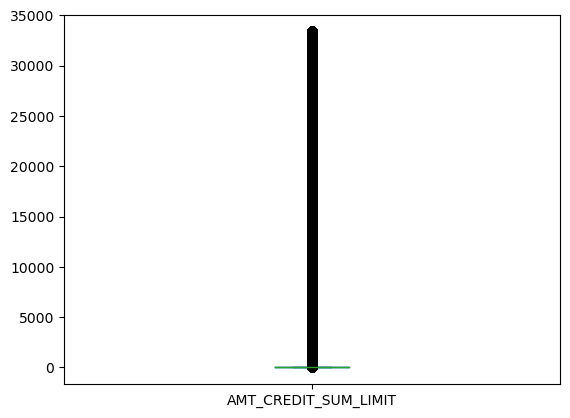

In [170]:
df_bureau_agg.AMT_CREDIT_SUM_LIMIT.plot.box()

In [171]:
df_bureau_agg.AMT_CREDIT_SUM_LIMIT.describe()

count    280503.000000
mean       3005.130238
std        8434.274574
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33387.449000
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64

In [172]:
df_bureau_agg.AMT_CREDIT_SUM_LIMIT.fillna(0, inplace= True)

In [173]:
df_bureau_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305811 entries, 0 to 305810
Data columns (total 28 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   SK_ID_CURR                                                305811 non-null  float64
 1   DAYS_CREDIT                                               305811 non-null  float64
 2   CREDIT_DAY_OVERDUE                                        305811 non-null  float64
 3   DAYS_CREDIT_ENDDATE                                       305811 non-null  float64
 4   CNT_CREDIT_PROLONG                                        305811 non-null  float64
 5   AMT_CREDIT_SUM                                            305809 non-null  float64
 6   AMT_CREDIT_SUM_LIMIT                                      305811 non-null  float64
 7   AMT_CREDIT_SUM_OVERDUE                                    305811 non-null  float64
 8   CRED

In [174]:
df_bureau_agg.AMT_CREDIT_SUM.fillna(0, inplace= True)

In [175]:
df_bureau_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305811 entries, 0 to 305810
Data columns (total 28 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   SK_ID_CURR                                                305811 non-null  float64
 1   DAYS_CREDIT                                               305811 non-null  float64
 2   CREDIT_DAY_OVERDUE                                        305811 non-null  float64
 3   DAYS_CREDIT_ENDDATE                                       305811 non-null  float64
 4   CNT_CREDIT_PROLONG                                        305811 non-null  float64
 5   AMT_CREDIT_SUM                                            305811 non-null  float64
 6   AMT_CREDIT_SUM_LIMIT                                      305811 non-null  float64
 7   AMT_CREDIT_SUM_OVERDUE                                    305811 non-null  float64
 8   CRED

['CREDIT_TYPE_Credit card']


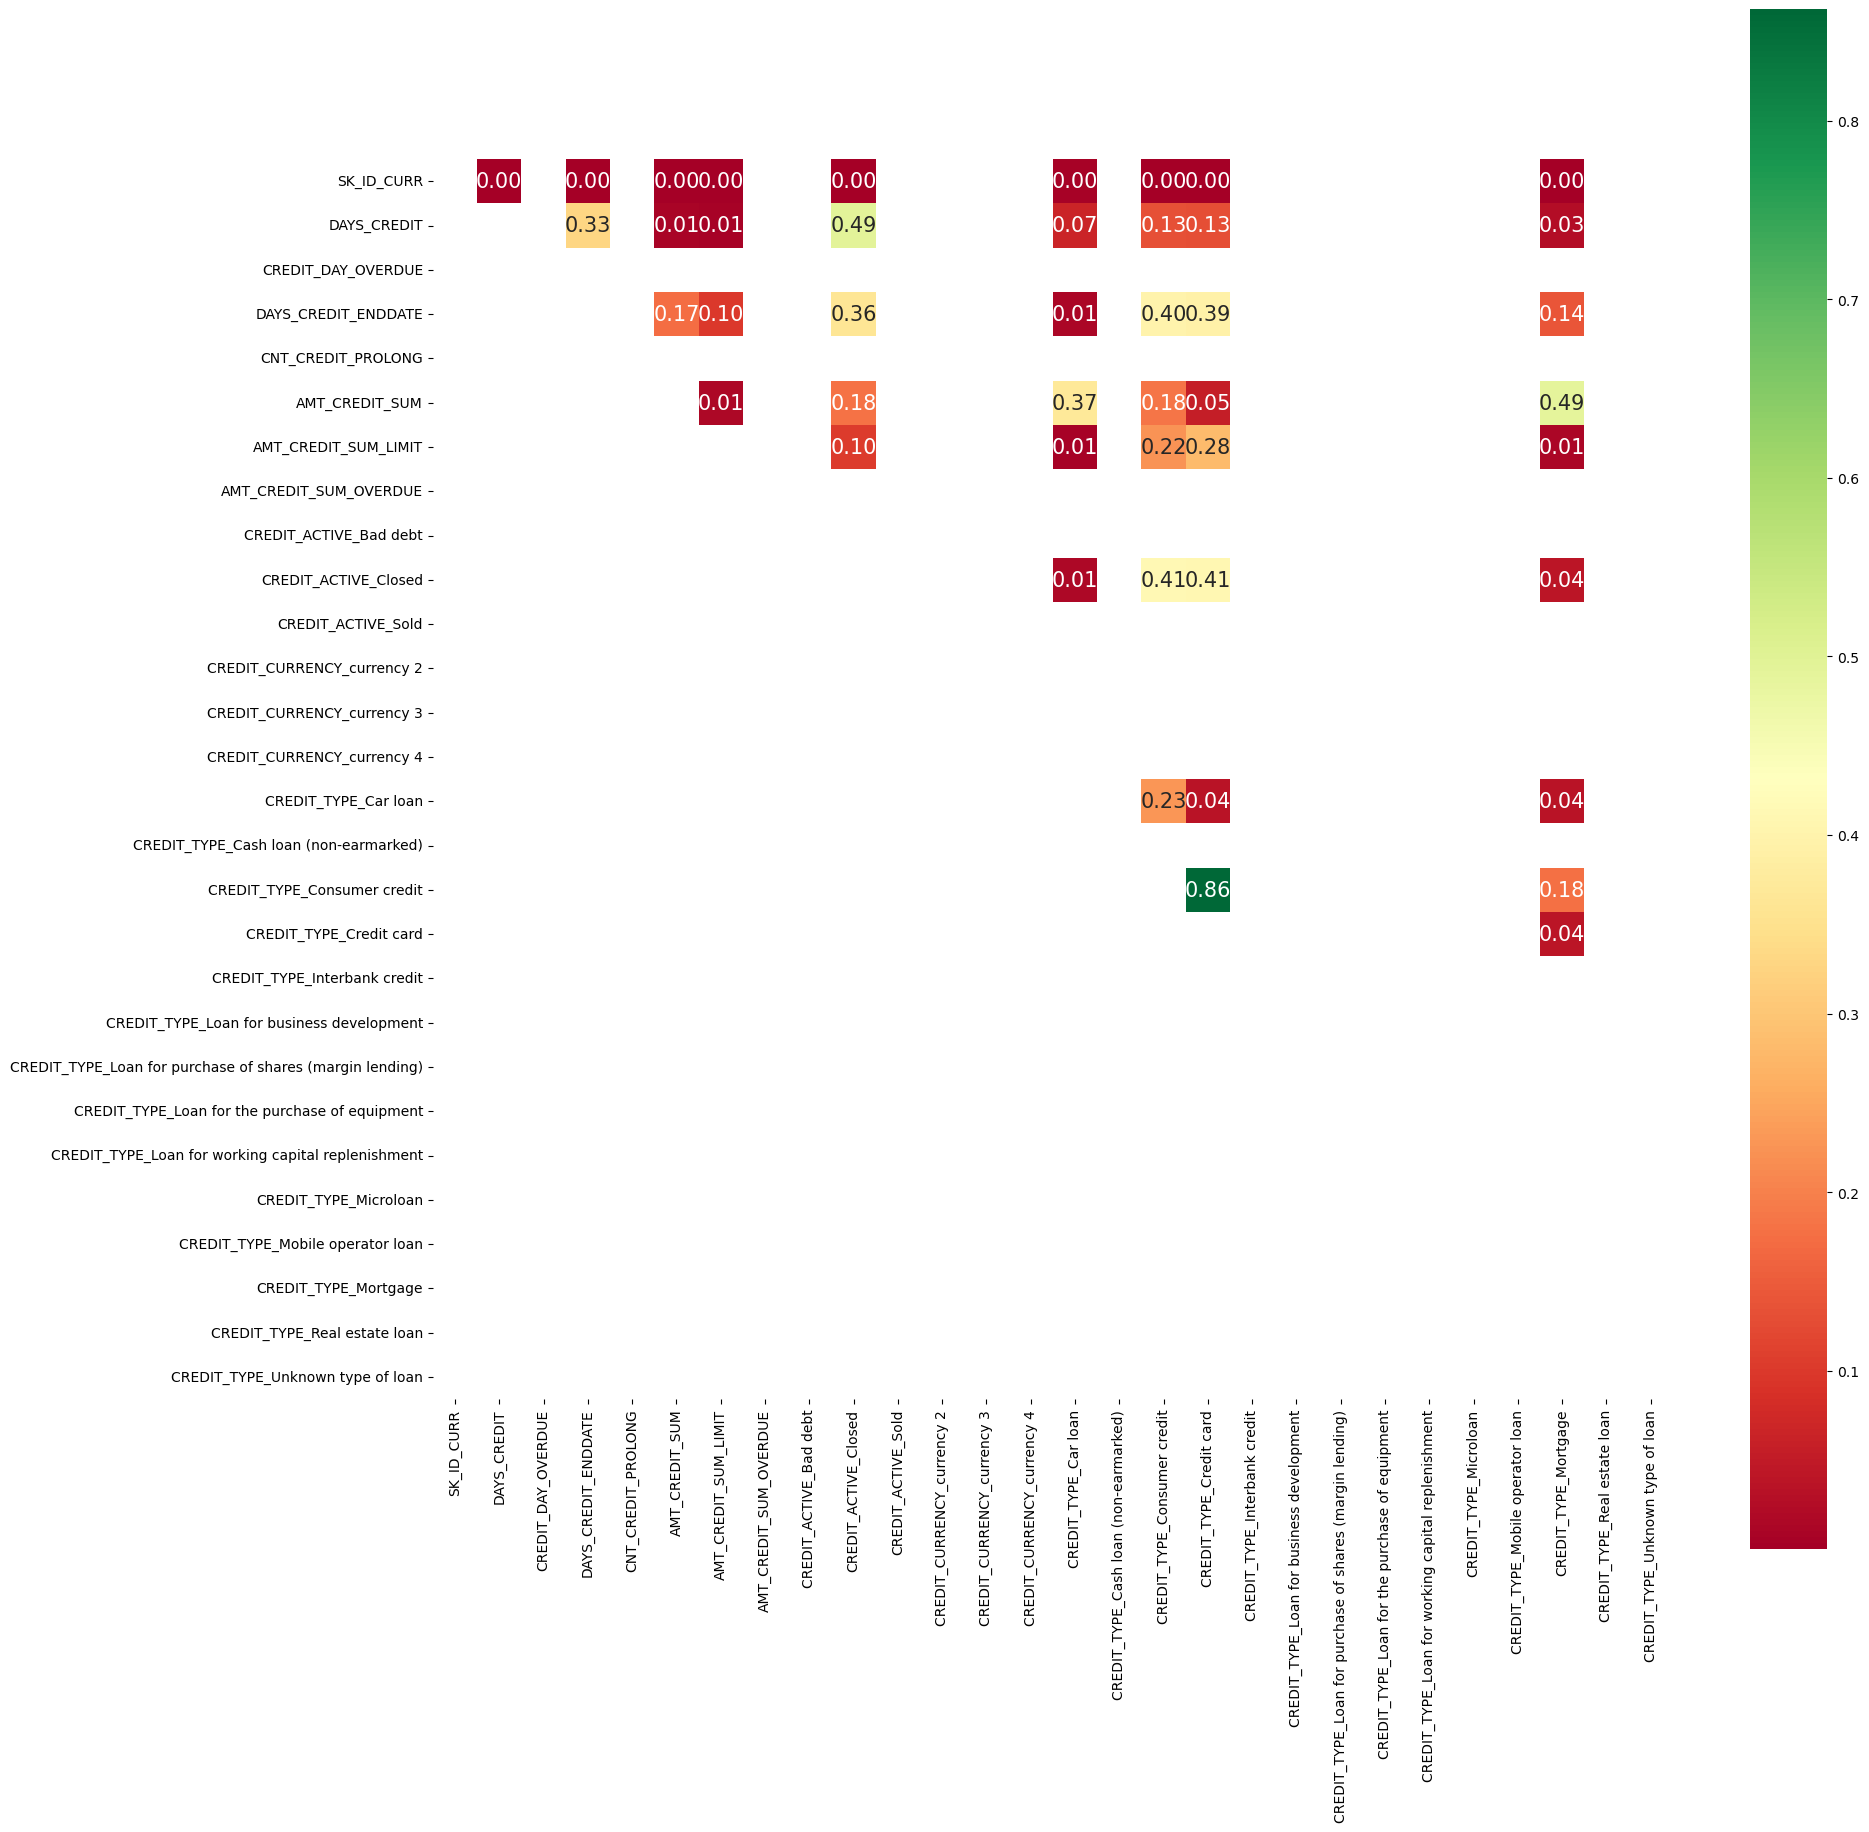

In [176]:
# Create correlation matrix
corr_matrix = df_bureau_agg.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='RdYlGn')

# Find features with correlation greater than 0.7
high_corr_columns = [column for column in upper.columns if any(upper[column] > 0.7)]
print(high_corr_columns)

In [177]:
df_bureau_agg.drop('CREDIT_TYPE_Credit card', axis=1, inplace= True)

In [178]:
round(df_bureau_agg.isnull().sum()/len(df_bureau_agg)*100,2)

SK_ID_CURR                                                  0.0
DAYS_CREDIT                                                 0.0
CREDIT_DAY_OVERDUE                                          0.0
DAYS_CREDIT_ENDDATE                                         0.0
CNT_CREDIT_PROLONG                                          0.0
AMT_CREDIT_SUM                                              0.0
AMT_CREDIT_SUM_LIMIT                                        0.0
AMT_CREDIT_SUM_OVERDUE                                      0.0
CREDIT_ACTIVE_Bad debt                                      0.0
CREDIT_ACTIVE_Closed                                        0.0
CREDIT_ACTIVE_Sold                                          0.0
CREDIT_CURRENCY_currency 2                                  0.0
CREDIT_CURRENCY_currency 3                                  0.0
CREDIT_CURRENCY_currency 4                                  0.0
CREDIT_TYPE_Car loan                                        0.0
CREDIT_TYPE_Cash loan (non-earmarked)   

In [179]:
df_bureau_agg.columns

Index(['SK_ID_CURR', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'CREDIT_ACTIVE_Bad debt', 'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold',
       'CREDIT_CURRENCY_currency 2', 'CREDIT_CURRENCY_currency 3',
       'CREDIT_CURRENCY_currency 4', 'CREDIT_TYPE_Car loan',
       'CREDIT_TYPE_Cash loan (non-earmarked)', 'CREDIT_TYPE_Consumer credit',
       'CREDIT_TYPE_Interbank credit',
       'CREDIT_TYPE_Loan for business development',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Loan for the purchase of equipment',
       'CREDIT_TYPE_Loan for working capital replenishment',
       'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mobile operator loan',
       'CREDIT_TYPE_Mortgage', 'CREDIT_TYPE_Real estate loan',
       'CREDIT_TYPE_Unknown type of loan'],
      dtype='object')

In [180]:
df1 = data1_obj.merge(df_bureau_agg, how= 'left', on='SK_ID_CURR' )

In [181]:
df1.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_CREDIT  REGION_POPULATION_RELATIVE  \
0      100002       1             0    406597.5                    0.018801   
1      100003       0             0   1293502.5                    0.003541   
2      100004       0             0    135000.0                    0.010032   
3      100006       0             0    312682.5                    0.008019   
4      100007       0             0    513000.0                    0.028663   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  REGION_RATING_CLIENT  \
0                 10                6                     2   
1                  3                1                     1   
2                 12                7                     2   
3                 27                7                     2   
4                 12                9                     2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       0                       1   

   DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 -1134.0                         0.0   
1                  -828.0                         0.0   
2                  -815.0                         0.0   
3                  -617.0                         0.0   
4                 -1106.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR AMT_GOODS_PRICE_RANGE AMT_CREDIT_RANGE  \
0                         1.0             300K-400K        400K-600K   
1                         0.0            Above 900K         Above 1M   
2                         0.0             100K-200K           0-200K   
3                         1.0             200K-300K        200K-400K   
4                         0.0             500K-600K        400K-600K   

  AMT_ANNUITY_RANGE DAYS_ID_PUBLISH_RANGE  NAME_CONTRACT_TYPE_Revolving loans  \
0             0-25K                5Y-10Y                                   0   
1           25K-50K                  0-5Y                                   0   
2             0-25K                5Y-10Y                                   1   
3           25K-50K                5Y-10Y                                   0   
4             0-25K                5Y-10Y                                   0   

   CODE_GENDER_M  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  NAME_TYPE_SUITE_Family  \
0              1               0                  1                       0   
1              0               0                  0                       1   
2              1               1                  1                       0   
3              0  

In [182]:
df1.shape

(307511, 165)

In [213]:
df1.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 165 columns):
 #    Column                                                    Dtype   
---   ------                                                    -----   
 0    SK_ID_CURR                                                int64   
 1    TARGET                                                    int64   
 2    CNT_CHILDREN                                              int64   
 3    AMT_CREDIT                                                float64 
 4    REGION_POPULATION_RELATIVE                                float64 
 5    DAYS_REGISTRATION                                         int64   
 6    DAYS_ID_PUBLISH                                           int64   
 7    REGION_RATING_CLIENT                                      int64   
 8    HOUR_APPR_PROCESS_START                                   int64   
 9    REG_REGION_NOT_LIVE_REGION                                int64   
 10   REG_RE

In [216]:
df1.drop(['DAYS_ID_PUBLISH_RANGE','AMT_ANNUITY_RANGE','AMT_CREDIT_RANGE','AMT_GOODS_PRICE_RANGE'], axis=1, inplace= True)

In [229]:
round(df1.isnull().sum()/len(df1)*100,2)

SK_ID_CURR                                                   0.00
TARGET                                                       0.00
CNT_CHILDREN                                                 0.00
AMT_CREDIT                                                   0.00
REGION_POPULATION_RELATIVE                                   0.00
DAYS_REGISTRATION                                            0.00
DAYS_ID_PUBLISH                                              0.00
REGION_RATING_CLIENT                                         0.00
HOUR_APPR_PROCESS_START                                      0.00
REG_REGION_NOT_LIVE_REGION                                   0.00
REG_REGION_NOT_WORK_REGION                                   0.00
REG_CITY_NOT_LIVE_CITY                                       0.00
REG_CITY_NOT_WORK_CITY                                       0.00
DAYS_LAST_PHONE_CHANGE                                       0.00
AMT_REQ_CREDIT_BUREAU_HOUR                                   0.00
AMT_REQ_CR

In [231]:
df2=df1.fillna(df1.median())

In [232]:
df2.shape

(307511, 161)

In [233]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [234]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X= df2.drop(['TARGET','SK_ID_CURR'], axis=1)
# Putting response variable to y
y= df2.TARGET

In [235]:
np.random.seed(0)
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [236]:
X_train.shape

(215257, 159)

In [237]:
X_test.shape

(92254, 159)

In [238]:
from sklearn.preprocessing import StandardScaler

In [239]:
numeric_cols= []
for i in df1.columns:
    if df1[i].dtype == 'float64' or 'int64':
           numeric_cols.append(i)

In [240]:
numeric_cols.remove('TARGET')
numeric_cols.remove('SK_ID_CURR')

In [241]:
print(numeric_cols)

['CNT_CHILDREN', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Other', 'NAME_TYPE_SUITE_Spouse, partner', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME

In [242]:
scaler= StandardScaler()
X_train[numeric_cols]= scaler.fit_transform(X_train[numeric_cols])
X_train.head()

CNT_CHILDREN  AMT_CREDIT  REGION_POPULATION_RELATIVE  \
221932     -0.578632    1.318943                    0.396245   
145353     -0.578632    1.635144                   -1.231399   
69179       0.806524    0.454066                   -1.135452   
295472      3.576834   -0.855449                   -0.086952   
190142     -0.578632    1.306212                    0.840947   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  REGION_RATING_CLIENT  \
221932           2.933506         0.916106             -0.101347   
145353          -0.895795         0.193293             -0.101347   
69179            0.242646         0.916106             -0.101347   
295472          -1.309773        -1.252332             -0.101347   
190142           1.174098        -0.529519             -2.064431   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
221932                 0.896745                   -0.124219   
145353                -1.245214                   -0.124219   
69179                 -0.021238                   -0.124219   
295472                 1.202739                   -0.124219   
190142                 1.202739                   -0.124219   

        REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
221932                   -0.231162               -0.292237   
145353                   -0.231162               -0.292237   
69179                    -0.231162               -0.292237   
295472                   -0.231162               -0.292237   
190142                   -0.231162               -0.292237   

        REG_CITY_NOT_WORK_CITY  DAYS_LAST_PHONE_CHANGE  \
221932               -0.547868                0.116045   
145353               -0.547868               -0.598426   
69179                -0.547868               -2.807120   
295472               -0.547868               -1.703378   
190142               -0.547868                0.388051   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
221932                    -0.07212                  -0.058777   
145353                    -0.07212                  -0.058777   
69179                     -0.07212                  -0.058777   
295472                    -0.07212                  -0.058777   
190142                    -0.07212                  -0.058777   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
221932                    -0.15809                  -0.269254   
145353                    -0.15809                  -0.269254   
69179                     -0.15809                  -0.269254   
295472                    -0.15809                   0.889159   
190142                    -0.15809                  -0.269254   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
221932                  -0.286715                    2.950523   
145353                  -0.286715                    0.124672   
69179                   -0.286715                   -1.005668   
295472                  -0.286715                    0.689842   
190142                   3.429263                   -0.440498   

        NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
221932                           -0.325093      -0.720593       -0.718459   
145353                           -0.325093      -0.720593        1.391869   
69179                            -0.325093       1.387746        1.391869   
295472                           -0.325093       1.387746       -0.718459   
190142                           -0.325093      -0.720593       -0.718459   

        FLAG_OWN_REALTY_Y  NAME_TYPE_SUITE_Family  NAME_TYPE_SUITE_Other  \
221932           0.663971                2.579243               -0.09694   
145353           0.663971               -0.387711               -0.09694   
69179           -1.506089               -0.387711               -0.09694   
295472           0.663971               -0.387711               -0.09694   
190142          -1.506089               -0.387711               -0.09694   

        NAME_TYPE_SU

In [243]:
### Checking the converted rate
TARGET = round((sum(df1['TARGET'])/len(df1['TARGET'].index))*100,2)
TARGET

8.07

## The data which have high data implance. In order the reduce the implance let's use SMOTE+TOMEK technique

In [244]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=42)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

395882

In [245]:
from collections import Counter
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 197941), (1, 197941)]


In [246]:
print(X_train.shape)
print(X_resampled_smt_tmk.shape)
print(y_train.shape)
print(y_resampled_smt_tmk.shape)

(215257, 159)
(395882, 159)
(215257,)
(395882,)


In [247]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [248]:
##### from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=30)             
rfe = rfe.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

In [249]:
rfe.support_

array([False, False, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True,  True, False,  True, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [251]:
list(zip(X_resampled_smt_tmk.columns, rfe.support_, rfe.ranking_))

[('CNT_CHILDREN', False, 17),
 ('AMT_CREDIT', False, 20),
 ('REGION_POPULATION_RELATIVE', False, 27),
 ('DAYS_REGISTRATION', True, 1),
 ('DAYS_ID_PUBLISH', True, 1),
 ('REGION_RATING_CLIENT', True, 1),
 ('HOUR_APPR_PROCESS_START', False, 60),
 ('REG_REGION_NOT_LIVE_REGION', False, 76),
 ('REG_REGION_NOT_WORK_REGION', False, 15),
 ('REG_CITY_NOT_LIVE_CITY', False, 110),
 ('REG_CITY_NOT_WORK_CITY', False, 85),
 ('DAYS_LAST_PHONE_CHANGE', True, 1),
 ('AMT_REQ_CREDIT_BUREAU_HOUR', False, 77),
 ('AMT_REQ_CREDIT_BUREAU_DAY', False, 64),
 ('AMT_REQ_CREDIT_BUREAU_WEEK', False, 13),
 ('AMT_REQ_CREDIT_BUREAU_MON', False, 18),
 ('AMT_REQ_CREDIT_BUREAU_QRT', True, 1),
 ('AMT_REQ_CREDIT_BUREAU_YEAR', False, 97),
 ('NAME_CONTRACT_TYPE_Revolving loans', True, 1),
 ('CODE_GENDER_M', True, 1),
 ('FLAG_OWN_CAR_Y', True, 1),
 ('FLAG_OWN_REALTY_Y', False, 4),
 ('NAME_TYPE_SUITE_Family', True, 1),
 ('NAME_TYPE_SUITE_Other', False, 87),
 ('NAME_TYPE_SUITE_Spouse, partner', False, 3),
 ('NAME_INCOME_TYPE_Com

In [252]:
col = X_resampled_smt_tmk.columns[rfe.support_]

In [253]:
col

Index(['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'NAME_TYPE_SUITE_Family', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_FAMILY_STATUS_Unknown',
       'Appl_AGE_45Y-50Y', 'Appl_AGE_50Y-55Y', 'Appl_AGE_55Y-60Y',
       'Appl_AGE_60Y+', 'APPL_EXP_RANGE_5Y-10Y', 'APPL_EXP_RANGE_10Y-15Y',
       'APPL_EXP_RANGE_15Y-20Y', 'APPL_EXP_RANGE_20Y-25Y',
       'APPL_EXP_RANGE_40Y-45Y', 'DAYS_CREDIT', 'AMT_CREDIT_SUM_LIMIT',
       'CREDIT_ACTIVE_Closed', 'CREDIT_TYPE_Mortgage'],
      dtype='object')

In [254]:
X_resampled_smt_tmk.columns[~rfe.support_]

Index(['CNT_CHILDREN', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY',
       ...
       'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Interbank credit',
       'CREDIT_TYPE_Loan for business development',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Loan for the purchase of equipment',
       'CREDIT_TYPE_Loan for working capital replenishment',
       'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mobile operator loan',
       'CREDIT_TYPE_Real estate loan', 'CREDIT_TYPE_Unknown type of loan'],
      dtype='object', length=129)

In [255]:
# Logistic regression model
import statsmodels.api as sm
X_resampled_smt_tmk_sm = sm.add_constant(X_resampled_smt_tmk[col])
logm1 = sm.GLM(y_resampled_smt_tmk,X_resampled_smt_tmk_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               395882
Model:                            GLM   Df Residuals:                   395851
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4479e+05
Date:                Tue, 14 Nov 2023   Deviance:                   4.8959e+05
Time:                        01:12:33   Pearson chi2:                 3.96e+05
No. Iterations:                    21   Pseudo R-squ. (CS):             0.1389
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2957      0.700     -0.422      0.673      -1.668       1.077
DAYS_REGISTRATION                        -0.1298      0.004    -32.838      0.000      -0.138      -0.122
DAYS_ID_PUBLISH                          -0.1545      0.004    -34.615      0.000      -0.163      -0.146
REGION_RATING_CLIENT                      0.2275      0.004     59.092      0.000       0.220       0.235
DAYS_LAST_PHONE_CHANGE                    0.1867      0.004     46.905      0.000       0.179       0.195
AMT_REQ_CREDIT_BUREAU_QRT                -0.1374      0.005    -25.474      0.000      -0.148      -0.127
NAME_CONTRACT_TYPE_Revolving loans       -0.2681      0.004    -63.212      0.000      -0.276      -0.260
CODE_GENDER_M                             0.2089      0.004     54.686      0.000       0.201       0.216
FLAG_OWN_CAR_Y                           -0.1993      0.004    -49.544      0.000      -0.207      -0.191
NAME_TYPE_SUITE_Family                   -0.0846      0.004    -22.352      0.000      -0.092      -0.077
NAME_INCOME_TYPE_Commercial associate    -0.5241      0.136     -3.868      0.000      -0.790      -0.259
NAME_INCOME_TYPE_Pensioner               -0.4575      0.123     -3.722      0.000      -0.698      -0.217
NAME_INCOME_TYPE_State servant           -0.3614      0.082     -4.396      0.000      -0.523      -0.200
NAME_INCOME_TYPE_Student                 -0.1744     88.874     -0.002      0.998    -174.364     174.015
NAME_INCOME_TYPE_Working                 -0.4877      0.160     -3.047      0.002      -0.801      -0.174
NAME_EDUCATION_TYPE_Higher education     -0.3054      0.004    -74.106      0.000      -0.313      -0.297
NAME_EDUCATION_TYPE_Incomplete higher    -0.1103      0.004    -30.020      0.000      -0.117      -0.103
NAME_FAMILY_STATUS_Unknown               -0.0473    103.880     -0.000      1.000    -203.649     203.554
Appl_AGE_45Y-50Y                         -0.1472      0.004    -34.500      0.000      -0.156      -0.139
Appl_AGE_50Y-55Y                         -0.1536      0.004    -38.074      0.000      -0.161      -0.146
Appl_AGE_55Y-60Y                         -0.1833      0.005    -35.876      0.000      -0.193      -0.173
Appl_AGE_60Y+                            -0.1725      0.006    -29.591      0.000      -0.184      -0.161
APPL_EXP_RANGE_5Y-10Y                    -0.1507      0.004    -38.146      0.000      -0.158      -0.143
APPL_EXP_RANGE_10Y-15Y                   -0.1897      0.004    -44.243      0.000      -0.198      -0.181
APPL_EXP_RANGE_15Y-20Y                   -0.1248      0.004    -29.232      0.000      -0.133      -0.116
APPL_EXP_RANGE_20Y-25Y                   -0.0845      0.004    -20.178      0.000      -0.093      -0.076
APPL_EXP_

In [256]:
# The P value is greater the 0.05
col= col.drop(['NAME_FAMILY_STATUS_Unknown'])

In [257]:
X_resampled_smt_tmk_sm = sm.add_constant(X_resampled_smt_tmk[col])
logm2 = sm.GLM(y_resampled_smt_tmk,X_resampled_smt_tmk_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               395882
Model:                            GLM   Df Residuals:                   395852
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4479e+05
Date:                Tue, 14 Nov 2023   Deviance:                   4.8959e+05
Time:                        01:14:01   Pearson chi2:                 3.97e+05
No. Iterations:                    21   Pseudo R-squ. (CS):             0.1389
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2956      0.664     -0.445      0.656      -1.596       1.005
DAYS_REGISTRATION                        -0.1298      0.004    -32.837      0.000      -0.138      -0.122
DAYS_ID_PUBLISH                          -0.1545      0.004    -34.614      0.000      -0.163      -0.146
REGION_RATING_CLIENT                      0.2275      0.004     59.092      0.000       0.220       0.235
DAYS_LAST_PHONE_CHANGE                    0.1867      0.004     46.905      0.000       0.179       0.195
AMT_REQ_CREDIT_BUREAU_QRT                -0.1374      0.005    -25.473      0.000      -0.148      -0.127
NAME_CONTRACT_TYPE_Revolving loans       -0.2681      0.004    -63.217      0.000      -0.276      -0.260
CODE_GENDER_M                             0.2089      0.004     54.687      0.000       0.201       0.216
FLAG_OWN_CAR_Y                           -0.1993      0.004    -49.543      0.000      -0.207      -0.191
NAME_TYPE_SUITE_Family                   -0.0846      0.004    -22.351      0.000      -0.092      -0.077
NAME_INCOME_TYPE_Commercial associate    -0.5242      0.136     -3.868      0.000      -0.790      -0.259
NAME_INCOME_TYPE_Pensioner               -0.4575      0.123     -3.722      0.000      -0.698      -0.217
NAME_INCOME_TYPE_State servant           -0.3614      0.082     -4.396      0.000      -0.523      -0.200
NAME_INCOME_TYPE_Student                 -0.1744     88.874     -0.002      0.998    -174.363     174.015
NAME_INCOME_TYPE_Working                 -0.4877      0.160     -3.047      0.002      -0.801      -0.174
NAME_EDUCATION_TYPE_Higher education     -0.3054      0.004    -74.108      0.000      -0.313      -0.297
NAME_EDUCATION_TYPE_Incomplete higher    -0.1103      0.004    -30.020      0.000      -0.117      -0.103
Appl_AGE_45Y-50Y                         -0.1472      0.004    -34.499      0.000      -0.156      -0.139
Appl_AGE_50Y-55Y                         -0.1536      0.004    -38.073      0.000      -0.161      -0.146
Appl_AGE_55Y-60Y                         -0.1833      0.005    -35.876      0.000      -0.193      -0.173
Appl_AGE_60Y+                            -0.1725      0.006    -29.591      0.000      -0.184      -0.161
APPL_EXP_RANGE_5Y-10Y                    -0.1507      0.004    -38.145      0.000      -0.158      -0.143
APPL_EXP_RANGE_10Y-15Y                   -0.1897      0.004    -44.242      0.000      -0.198      -0.181
APPL_EXP_RANGE_15Y-20Y                   -0.1248      0.004    -29.232      0.000      -0.133      -0.116
APPL_EXP_RANGE_20Y-25Y                   -0.0845      0.004    -20.178      0.000      -0.093      -0.076
APPL_EXP_RANGE_40Y-45Y                   -0.1113      0.026     -4.205      0.000      -0.163      -0.059
DAYS_CRED

In [258]:
# drop the column have the P value is greater the 0.05
col= col.drop(['NAME_INCOME_TYPE_Student'])

In [259]:
X_resampled_smt_tmk_sm = sm.add_constant(X_resampled_smt_tmk[col])
logm3 = sm.GLM(y_resampled_smt_tmk,X_resampled_smt_tmk_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               395882
Model:                            GLM   Df Residuals:                   395853
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4481e+05
Date:                Tue, 14 Nov 2023   Deviance:                   4.8961e+05
Time:                        01:15:37   Pearson chi2:                 3.97e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1389
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2944      0.004    -78.022      0.000      -0.302      -0.287
DAYS_REGISTRATION                        -0.1298      0.004    -32.837      0.000      -0.138      -0.122
DAYS_ID_PUBLISH                          -0.1545      0.004    -34.611      0.000      -0.163      -0.146
REGION_RATING_CLIENT                      0.2275      0.004     59.095      0.000       0.220       0.235
DAYS_LAST_PHONE_CHANGE                    0.1867      0.004     46.906      0.000       0.179       0.195
AMT_REQ_CREDIT_BUREAU_QRT                -0.1374      0.005    -25.473      0.000      -0.148      -0.127
NAME_CONTRACT_TYPE_Revolving loans       -0.2680      0.004    -63.197      0.000      -0.276      -0.260
CODE_GENDER_M                             0.2088      0.004     54.664      0.000       0.201       0.216
FLAG_OWN_CAR_Y                           -0.1993      0.004    -49.531      0.000      -0.207      -0.191
NAME_TYPE_SUITE_Family                   -0.0846      0.004    -22.360      0.000      -0.092      -0.077
NAME_INCOME_TYPE_Commercial associate    -0.2780      0.119     -2.345      0.019      -0.510      -0.046
NAME_INCOME_TYPE_Pensioner               -0.2344      0.108     -2.179      0.029      -0.445      -0.024
NAME_INCOME_TYPE_State servant           -0.2122      0.072     -2.949      0.003      -0.353      -0.071
NAME_INCOME_TYPE_Working                 -0.1968      0.140     -1.406      0.160      -0.471       0.078
NAME_EDUCATION_TYPE_Higher education     -0.3054      0.004    -74.114      0.000      -0.313      -0.297
NAME_EDUCATION_TYPE_Incomplete higher    -0.1103      0.004    -30.034      0.000      -0.117      -0.103
Appl_AGE_45Y-50Y                         -0.1472      0.004    -34.502      0.000      -0.156      -0.139
Appl_AGE_50Y-55Y                         -0.1536      0.004    -38.074      0.000      -0.161      -0.146
Appl_AGE_55Y-60Y                         -0.1832      0.005    -35.865      0.000      -0.193      -0.173
Appl_AGE_60Y+                            -0.1724      0.006    -29.568      0.000      -0.184      -0.161
APPL_EXP_RANGE_5Y-10Y                    -0.1507      0.004    -38.140      0.000      -0.158      -0.143
APPL_EXP_RANGE_10Y-15Y                   -0.1898      0.004    -44.262      0.000      -0.198      -0.181
APPL_EXP_RANGE_15Y-20Y                   -0.1248      0.004    -29.234      0.000      -0.133      -0.116
APPL_EXP_RANGE_20Y-25Y                   -0.0846      0.004    -20.188      0.000      -0.093      -0.076
APPL_EXP_RANGE_40Y-45Y                   -0.1113      0.026     -4.205      0.000      -0.163      -0.059
DAYS_CREDIT                               0.1689      0.005     36.937      0.000       0.160       0.178
AMT_CREDI

In [260]:
# drop the column have the P value is greater the 0.05
col= col.drop(['NAME_INCOME_TYPE_Working'])

In [261]:
X_resampled_smt_tmk_sm = sm.add_constant(X_resampled_smt_tmk[col])
logm4 = sm.GLM(y_resampled_smt_tmk,X_resampled_smt_tmk_sm, family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               395882
Model:                            GLM   Df Residuals:                   395854
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4481e+05
Date:                Tue, 14 Nov 2023   Deviance:                   4.8962e+05
Time:                        01:17:35   Pearson chi2:                 3.97e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1389
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2944      0.004    -78.021      0.000      -0.302      -0.287
DAYS_REGISTRATION                        -0.1298      0.004    -32.838      0.000      -0.138      -0.122
DAYS_ID_PUBLISH                          -0.1545      0.004    -34.606      0.000      -0.163      -0.146
REGION_RATING_CLIENT                      0.2275      0.004     59.093      0.000       0.220       0.235
DAYS_LAST_PHONE_CHANGE                    0.1867      0.004     46.906      0.000       0.179       0.195
AMT_REQ_CREDIT_BUREAU_QRT                -0.1374      0.005    -25.480      0.000      -0.148      -0.127
NAME_CONTRACT_TYPE_Revolving loans       -0.2680      0.004    -63.186      0.000      -0.276      -0.260
CODE_GENDER_M                             0.2088      0.004     54.660      0.000       0.201       0.216
FLAG_OWN_CAR_Y                           -0.1993      0.004    -49.525      0.000      -0.207      -0.191
NAME_TYPE_SUITE_Family                   -0.0846      0.004    -22.366      0.000      -0.092      -0.077
NAME_INCOME_TYPE_Commercial associate    -0.1114      0.004    -28.425      0.000      -0.119      -0.104
NAME_INCOME_TYPE_Pensioner               -0.0834      0.006    -13.441      0.000      -0.096      -0.071
NAME_INCOME_TYPE_State servant           -0.1112      0.004    -27.216      0.000      -0.119      -0.103
NAME_EDUCATION_TYPE_Higher education     -0.3054      0.004    -74.109      0.000      -0.313      -0.297
NAME_EDUCATION_TYPE_Incomplete higher    -0.1103      0.004    -30.034      0.000      -0.117      -0.103
Appl_AGE_45Y-50Y                         -0.1472      0.004    -34.503      0.000      -0.156      -0.139
Appl_AGE_50Y-55Y                         -0.1536      0.004    -38.071      0.000      -0.161      -0.146
Appl_AGE_55Y-60Y                         -0.1832      0.005    -35.861      0.000      -0.193      -0.173
Appl_AGE_60Y+                            -0.1723      0.006    -29.555      0.000      -0.184      -0.161
APPL_EXP_RANGE_5Y-10Y                    -0.1507      0.004    -38.135      0.000      -0.158      -0.143
APPL_EXP_RANGE_10Y-15Y                   -0.1898      0.004    -44.260      0.000      -0.198      -0.181
APPL_EXP_RANGE_15Y-20Y                   -0.1248      0.004    -29.237      0.000      -0.133      -0.116
APPL_EXP_RANGE_20Y-25Y                   -0.0846      0.004    -20.188      0.000      -0.093      -0.076
APPL_EXP_RANGE_40Y-45Y                   -0.1113      0.026     -4.206      0.000      -0.163      -0.059
DAYS_CREDIT                               0.1689      0.005     36.939      0.000       0.160       0.178
AMT_CREDIT_SUM_LIMIT                     -0.0972      0.004    -23.639      0.000      -0.105      -0.089
CREDIT_AC

In [262]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt_tmk[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt_tmk[col].values, i) for i in range(X_resampled_smt_tmk[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10             NAME_INCOME_TYPE_Pensioner  2.88
17                          Appl_AGE_60Y+  2.37
16                       Appl_AGE_55Y-60Y  1.77
1                         DAYS_ID_PUBLISH  1.56
23                            DAYS_CREDIT  1.52
25                   CREDIT_ACTIVE_Closed  1.42
14                       Appl_AGE_45Y-50Y  1.39
0                       DAYS_REGISTRATION  1.18
6                           CODE_GENDER_M  1.18
7                          FLAG_OWN_CAR_Y  1.17
15                       Appl_AGE_50Y-55Y  1.16
9   NAME_INCOME_TYPE_Commercial associate  1.13
18                  APPL_EXP_RANGE_5Y-10Y  1.13
19                 APPL_EXP_RANGE_10Y-15Y  1.10
12   NAME_EDUCATION_TYPE_Higher education  1.09
3                  DAYS_LAST_PHONE_CHANGE  1.09
11         NAME_INCOME_TYPE_State servant  1.08
20                 APPL_EXP_RANGE_15Y-20Y  1.06
2                    REGION_RATING_CLIENT  1.05
21                 APPL_EXP_RANGE_20Y-25Y  1.04
24                   AMT_CREDIT_SUM_LIMIT  1.03
13  NAME_EDUCATION_TYPE_Incomplete higher  1.03
26                   CREDIT_TYPE_Mortgage  1.03
5      NAME_CONTRACT_TYPE_Revolving loans  1.02
22                 APPL_EXP_RANGE_40Y-45Y  1.01
8                  NAME_TYPE_SUITE_Family  1.01
4               AMT_REQ_CREDIT_BUREAU_QRT  1.00

In [263]:
col= col.drop(['NAME_INCOME_TYPE_Pensioner'])

In [264]:
X_resampled_smt_tmk_sm = sm.add_constant(X_resampled_smt_tmk[col])
logm5 = sm.GLM(y_resampled_smt_tmk,X_resampled_smt_tmk_sm, family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               395882
Model:                            GLM   Df Residuals:                   395855
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4490e+05
Date:                Tue, 14 Nov 2023   Deviance:                   4.8980e+05
Time:                        01:20:35   Pearson chi2:                 3.97e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1385
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2945      0.004    -78.011      0.000      -0.302      -0.287
DAYS_REGISTRATION                        -0.1303      0.004    -32.950      0.000      -0.138      -0.123
DAYS_ID_PUBLISH                          -0.1582      0.004    -35.525      0.000      -0.167      -0.149
REGION_RATING_CLIENT                      0.2274      0.004     59.072      0.000       0.220       0.235
DAYS_LAST_PHONE_CHANGE                    0.1865      0.004     46.869      0.000       0.179       0.194
AMT_REQ_CREDIT_BUREAU_QRT                -0.1374      0.005    -25.478      0.000      -0.148      -0.127
NAME_CONTRACT_TYPE_Revolving loans       -0.2670      0.004    -62.985      0.000      -0.275      -0.259
CODE_GENDER_M                             0.2137      0.004     56.203      0.000       0.206       0.221
FLAG_OWN_CAR_Y                           -0.1981      0.004    -49.256      0.000      -0.206      -0.190
NAME_TYPE_SUITE_Family                   -0.0859      0.004    -22.709      0.000      -0.093      -0.078
NAME_INCOME_TYPE_Commercial associate    -0.1035      0.004    -26.703      0.000      -0.111      -0.096
NAME_INCOME_TYPE_State servant           -0.1070      0.004    -26.247      0.000      -0.115      -0.099
NAME_EDUCATION_TYPE_Higher education     -0.3050      0.004    -74.023      0.000      -0.313      -0.297
NAME_EDUCATION_TYPE_Incomplete higher    -0.1101      0.004    -30.003      0.000      -0.117      -0.103
Appl_AGE_45Y-50Y                         -0.1519      0.004    -35.737      0.000      -0.160      -0.144
Appl_AGE_50Y-55Y                         -0.1646      0.004    -41.656      0.000      -0.172      -0.157
Appl_AGE_55Y-60Y                         -0.2238      0.004    -54.011      0.000      -0.232      -0.216
Appl_AGE_60Y+                            -0.2261      0.004    -53.152      0.000      -0.234      -0.218
APPL_EXP_RANGE_5Y-10Y                    -0.1416      0.004    -36.338      0.000      -0.149      -0.134
APPL_EXP_RANGE_10Y-15Y                   -0.1822      0.004    -42.824      0.000      -0.191      -0.174
APPL_EXP_RANGE_15Y-20Y                   -0.1190      0.004    -27.989      0.000      -0.127      -0.111
APPL_EXP_RANGE_20Y-25Y                   -0.0799      0.004    -19.118      0.000      -0.088      -0.072
APPL_EXP_RANGE_40Y-45Y                   -0.1068      0.026     -4.032      0.000      -0.159      -0.055
DAYS_CREDIT                               0.1683      0.005     36.830      0.000       0.159       0.177
AMT_CREDIT_SUM_LIMIT                     -0.0966      0.004    -23.491      0.000      -0.105      -0.089
CREDIT_ACTIVE_Closed                     -0.1188      0.004    -27.123      0.000      -0.127      -0.110
CREDIT_TY

In [265]:
## No changes in the P value

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt_tmk[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_resampled_smt_tmk[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                         DAYS_ID_PUBLISH  1.56
13                       Appl_AGE_45Y-50Y  1.44
22                            DAYS_CREDIT  1.42
24                   CREDIT_ACTIVE_Closed  1.35
16                          Appl_AGE_60Y+  1.33
15                       Appl_AGE_55Y-60Y  1.22
7                          FLAG_OWN_CAR_Y  1.17
0                       DAYS_REGISTRATION  1.16
6                           CODE_GENDER_M  1.16
14                       Appl_AGE_50Y-55Y  1.15
9   NAME_INCOME_TYPE_Commercial associate  1.12
17                  APPL_EXP_RANGE_5Y-10Y  1.11
18                 APPL_EXP_RANGE_10Y-15Y  1.08
10         NAME_INCOME_TYPE_State servant  1.08
11   NAME_EDUCATION_TYPE_Higher education  1.08
3                  DAYS_LAST_PHONE_CHANGE  1.06
19                 APPL_EXP_RANGE_15Y-20Y  1.05
2                    REGION_RATING_CLIENT  1.04
25                   CREDIT_TYPE_Mortgage  1.04
12  NAME_EDUCATION_TYPE_Incomplete higher  1.04
20                 APPL_EXP_RANGE_20Y-25Y  1.03
5      NAME_CONTRACT_TYPE_Revolving loans  1.02
23                   AMT_CREDIT_SUM_LIMIT  1.02
4               AMT_REQ_CREDIT_BUREAU_QRT  1.00
21                 APPL_EXP_RANGE_40Y-45Y  1.00
8                  NAME_TYPE_SUITE_Family  1.00

### Prediction on Train data

In [266]:
# Getting the predicted values on the train set
y_pred_smt_tmk = logm5.fit().predict(X_resampled_smt_tmk_sm)
y_pred_smt_tmk[:10]

0    0.405790
1    0.185550
2    0.260684
3    0.446611
4    0.209956
5    0.166716
6    0.388531
7    0.393958
8    0.462676
9    0.312765
dtype: float64

In [267]:
# Reshaping into an array
y_pred_smt_tmk = y_pred_smt_tmk.values.reshape(-1)
y_pred_smt_tmk[:10]

array([0.40579031, 0.18555013, 0.26068381, 0.44661108, 0.20995634,
       0.16671632, 0.38853056, 0.39395818, 0.46267589, 0.31276537])

In [268]:
y_pred_smt_tmk_final = pd.DataFrame({'TARGET':y_resampled_smt_tmk.values, 'Prob':y_pred_smt_tmk})
y_pred_smt_tmk_final['SK_ID'] = y_resampled_smt_tmk.index
y_pred_smt_tmk_final.head()

TARGET      Prob  SK_ID
0       0  0.405790      0
1       0  0.185550      1
2       0  0.260684      2
3       0  0.446611      3
4       0  0.209956      4

## Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

## Creating new column 'Default' with 1 if Default_Prob > 0.5 else 0

In [269]:
y_pred_smt_tmk_final['Predicted'] = y_pred_smt_tmk_final.Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_pred_smt_tmk_final.head()

TARGET      Prob  SK_ID  Predicted
0       0  0.405790      0          0
1       0  0.185550      1          0
2       0  0.260684      2          0
3       0  0.446611      3          0
4       0  0.209956      4          0

In [270]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Predicted )
print(confusion)

[[127491  70450]
 [ 64882 133059]]


In [271]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Predicted))

Accuracy : 0.6581506610555671


In [272]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [273]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.6722154581415675
Specificity :  0.6440858639695667
False Positive Rate : 0.3559141360304333
Positive Predictive Value : 0.6538236638183078
Negative predictive value : 0.6627281375244967


### The model is good as Sensitivity is 67% and Specificity is 64%

This was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve


In [274]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [275]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Prob, drop_intermediate = False )

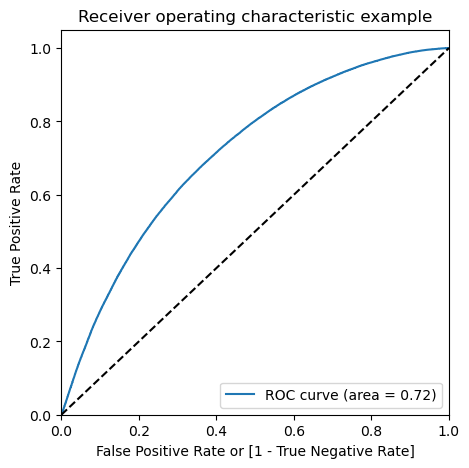

In [276]:
draw_roc(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Prob)

### Finding the Optimal Cut off Point

In [277]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_smt_tmk_final[i]= y_pred_smt_tmk_final.Prob.map(lambda x: 1 if x > i else 0)
y_pred_smt_tmk_final.head()

TARGET      Prob  SK_ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       0  0.405790      0          0    1    1    1    1    1    0    0    0   
1       0  0.185550      1          0    1    1    0    0    0    0    0    0   
2       0  0.260684      2          0    1    1    1    0    0    0    0    0   
3       0  0.446611      3          0    1    1    1    1    1    0    0    0   
4       0  0.209956      4          0    1    1    1    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0

In [278]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.510556  0.998661  0.022451
0.2   0.2  0.549343  0.984910  0.113776
0.3   0.3  0.601460  0.936688  0.266231
0.4   0.4  0.645046  0.834718  0.455373
0.5   0.5  0.658151  0.672215  0.644086
0.6   0.6  0.635679  0.468771  0.802588
0.7   0.7  0.580645  0.244770  0.916521
0.8   0.8  0.520349  0.060033  0.980666
0.9   0.9  0.500331  0.001051  0.999611


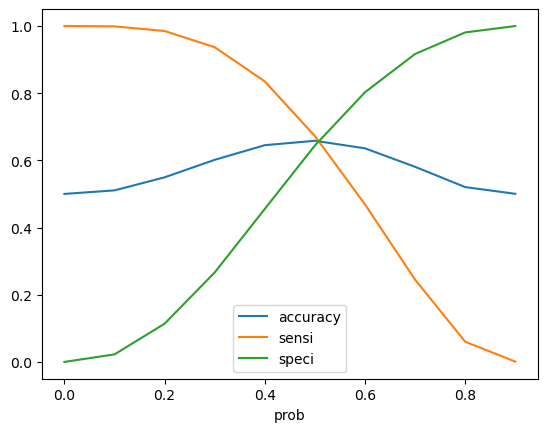

In [279]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [281]:
y_pred_smt_tmk_final['final_predicted'] = y_pred_smt_tmk_final.Prob.map( lambda x: 1 if x > 0.48 else 0)
y_pred_smt_tmk_final.head()

TARGET      Prob  SK_ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       0  0.405790      0          0    1    1    1    1    1    0    0    0   
1       0  0.185550      1          0    1    1    0    0    0    0    0    0   
2       0  0.260684      2          0    1    1    1    0    0    0    0    0   
3       0  0.446611      3          0    1    1    1    1    1    0    0    0   
4       0  0.209956      4          0    1    1    1    0    0    0    0    0   

   0.8  0.9  final_predicted  
0    0    0                0  
1    0    0                0  
2    0    0                0  
3    0    0                0  
4    0    0                0

In [282]:
y_pred_smt_tmk_final['default_Score'] = y_pred_smt_tmk_final.Prob.map( lambda x: round(x*100))
y_pred_smt_tmk_final.head()

TARGET      Prob  SK_ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       0  0.405790      0          0    1    1    1    1    1    0    0    0   
1       0  0.185550      1          0    1    1    0    0    0    0    0    0   
2       0  0.260684      2          0    1    1    1    0    0    0    0    0   
3       0  0.446611      3          0    1    1    1    1    1    0    0    0   
4       0  0.209956      4          0    1    1    1    0    0    0    0    0   

   0.8  0.9  final_predicted  default_Score  
0    0    0                0             41  
1    0    0                0             19  
2    0    0                0             26  
3    0    0                0             45  
4    0    0                0             21

In [283]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.final_predicted))

Accuracy : 0.657683350089168


In [284]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Predicted )
confusion

array([[127491,  70450],
       [ 64882, 133059]], dtype=int64)

In [285]:
# Precision
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

# Recall
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision :  0.6538236638183078
Recall : 0.6722154581415675


In [286]:
### Using sklearn utilities for the same

from sklearn.metrics import precision_score, recall_score

In [287]:
print("Precision :",precision_score(y_pred_smt_tmk_final.TARGET , y_pred_smt_tmk_final.Predicted))
print("Recall :",recall_score(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Predicted))

Precision : 0.6538236638183078
Recall : 0.6722154581415675


In [288]:
from sklearn.metrics import precision_recall_curve

y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Predicted

(0         0
 1         0
 2         0
 3         0
 4         0
          ..
 395877    1
 395878    1
 395879    1
 395880    1
 395881    1
 Name: TARGET, Length: 395882, dtype: int64,
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 395877    1
 395878    1
 395879    0
 395880    1
 395881    0
 Name: Predicted, Length: 395882, dtype: int64)

In [289]:
p, r, thresholds = precision_recall_curve(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Prob)

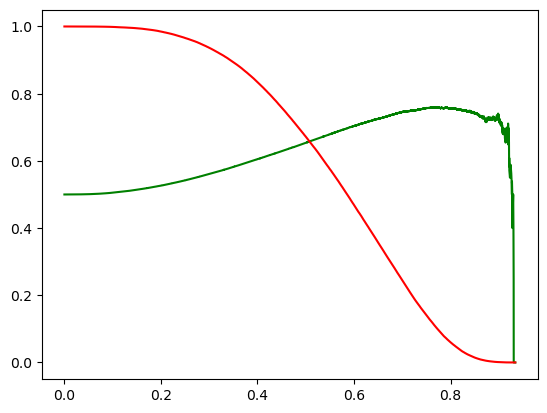

In [290]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Model evaluation on Test data

In [291]:
numeric_cols= []
for i in df2.columns:
    if df2[i].dtype == 'float64' or 'int64':
           numeric_cols.append(i)

In [292]:
numeric_cols.remove('SK_ID_CURR')
numeric_cols.remove('TARGET')

In [293]:
X_test[numeric_cols]= scaler.transform(X_test[numeric_cols])
X_test.head()

CNT_CHILDREN  AMT_CREDIT  REGION_POPULATION_RELATIVE  \
226323     -0.578632    1.711943                   -0.013135   
216456     -0.578632   -0.337365                   -0.979672   
36242      -0.578632    1.306212                   -0.833409   
227057     -0.578632    2.254571                    3.720592   
100973      0.806524   -0.534173                    0.840947   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  REGION_RATING_CLIENT  \
226323          -1.309773        -1.975144              1.861736   
216456          -1.413268         0.675168              1.861736   
36242           -0.481816         1.638918             -0.101347   
227057          -0.585311        -0.770457             -2.064431   
100973           1.381087         0.916106             -2.064431   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
226323                -0.939220                   -0.124219   
216456                 0.284757                   -0.124219   
36242                  0.590751                   -0.124219   
227057                 0.590751                   -0.124219   
100973                 0.284757                   -0.124219   

        REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
226323                   -0.231162               -0.292237   
216456                   -0.231162               -0.292237   
36242                    -0.231162               -0.292237   
227057                   -0.231162               -0.292237   
100973                   -0.231162               -0.292237   

        REG_CITY_NOT_WORK_CITY  DAYS_LAST_PHONE_CHANGE  \
226323               -0.547868               -0.808778   
216456               -0.547868                0.192207   
36242                -0.547868               -1.670737   
227057               -0.547868                0.871619   
100973               -0.547868               -0.540398   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
226323                    -0.07212                  -0.058777   
216456                    -0.07212                  -0.058777   
36242                     -0.07212                  -0.058777   
227057                    -0.07212                  -0.058777   
100973                    -0.07212                  -0.058777   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
226323                   -0.158090                   0.889159   
216456                   -0.158090                  -0.269254   
36242                    -0.158090                  -0.269254   
227057                    5.138418                  -0.269254   
100973                   -0.158090                  -0.269254   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
226323                  -0.286715                   -1.005668   
216456                  -0.286715                   -0.440498   
36242                   -0.286715                   -1.005668   
227057                  -0.286715                    0.689842   
100973                  -0.286715                   -1.005668   

        NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
226323                           -0.325093      -0.720593       -0.718459   
216456                           -0.325093      -0.720593       -0.718459   
36242                            -0.325093      -0.720593       -0.718459   
227057                           -0.325093       1.387746        1.391869   
100973                           -0.325093      -0.720593       -0.718459   

        FLAG_OWN_REALTY_Y  NAME_TYPE_SUITE_Family  NAME_TYPE_SUITE_Other  \
226323           0.663971               -0.387711               -0.09694   
216456           0.663971               -0.387711               -0.09694   
36242           -1.506089               -0.387711               -0.09694   
227057           0.663971               -0.387711               -0.09694   
100973           0.663971               -0.387711               -0.09694   

        NAME_TYPE_SU

In [295]:
col

Index(['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'NAME_TYPE_SUITE_Family', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_State servant',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher', 'Appl_AGE_45Y-50Y',
       'Appl_AGE_50Y-55Y', 'Appl_AGE_55Y-60Y', 'Appl_AGE_60Y+',
       'APPL_EXP_RANGE_5Y-10Y', 'APPL_EXP_RANGE_10Y-15Y',
       'APPL_EXP_RANGE_15Y-20Y', 'APPL_EXP_RANGE_20Y-25Y',
       'APPL_EXP_RANGE_40Y-45Y', 'DAYS_CREDIT', 'AMT_CREDIT_SUM_LIMIT',
       'CREDIT_ACTIVE_Closed', 'CREDIT_TYPE_Mortgage'],
      dtype='object')

In [296]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col]
X_test.head()

DAYS_REGISTRATION  DAYS_ID_PUBLISH  REGION_RATING_CLIENT  \
226323          -1.309773        -1.975144              1.861736   
216456          -1.413268         0.675168              1.861736   
36242           -0.481816         1.638918             -0.101347   
227057          -0.585311        -0.770457             -2.064431   
100973           1.381087         0.916106             -2.064431   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_QRT  \
226323               -0.808778                  -0.286715   
216456                0.192207                  -0.286715   
36242                -1.670737                  -0.286715   
227057                0.871619                  -0.286715   
100973               -0.540398                  -0.286715   

        NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
226323                           -0.325093      -0.720593       -0.718459   
216456                           -0.325093      -0.720593       -0.718459   
36242                            -0.325093      -0.720593       -0.718459   
227057                           -0.325093       1.387746        1.391869   
100973                           -0.325093      -0.720593       -0.718459   

        NAME_TYPE_SUITE_Family  NAME_INCOME_TYPE_Commercial associate  \
226323               -0.387711                              -0.551923   
216456               -0.387711                              -0.551923   
36242                -0.387711                              -0.551923   
227057               -0.387711                              -0.551923   
100973               -0.387711                               1.811845   

        NAME_INCOME_TYPE_State servant  NAME_EDUCATION_TYPE_Higher education  \
226323                       -0.276032                              1.762673   
216456                       -0.276032                             -0.567320   
36242                        -0.276032                             -0.567320   
227057                       -0.276032                              1.762673   
100973                       -0.276032                             -0.567320   

        NAME_EDUCATION_TYPE_Incomplete higher  Appl_AGE_45Y-50Y  \
226323                              -0.185277         -0.358107   
216456                              -0.185277         -0.358107   
36242                               -0.185277         -0.358107   
227057                              -0.185277         -0.358107   
100973                              -0.185277         -0.358107   

        Appl_AGE_50Y-55Y  Appl_AGE_55Y-60Y  Appl_AGE_60Y+  \
226323         -0.357677         -0.346946      -0.342611   
216456         -0.357677         -0.346946       2.918762   
36242          -0.357677         -0.346946      -0.342611   
227057         -0.357677         -0.346946       2.918762   
100973         -0.357677         -0.346946      -0.342611   

        APPL_EXP_RANGE_5Y-10Y  APPL_EXP_RANGE_10Y-15Y  APPL_EXP_RANGE_15Y-20Y  \
226323              -0.492662               -0.298908               -0.184713   
216456              -0.492662               -0.298908               -0.184713   
36242               -0.492662               -0.298908                5.413811   
227057              -0.492662               -0.298908               -0.184713   
100973              -0.492662                3.345506               -0.184713   

        APPL_EXP_RANGE_20Y-25Y  APPL_EXP_RANGE_40Y-45Y  DAYS_CREDIT  \
226323               -0.138928               -0.025236    -0.892752   
216456               -0.138928               -0.025236     0.033472   
36242                -0.138928               -0.025236    -0.386670   
227057               -0.138928               -0.025236     0.928701   
100973               -0.138928               -0.025236    -0.871194   

        AMT_CREDIT_SUM_LIMIT  CREDIT_ACTIVE_Closed  CREDIT_TYPE_Mortgage  
226323             -0.295236              0.580008             -0.209709  
216456         

In [297]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = logm5.fit().predict(X_test_sm)
y_test_pred[:10]

226323    0.611553
216456    0.603102
36242     0.331096
227057    0.331950
100973    0.132095
206396    0.336895
75447     0.488023
217793    0.817011
247724    0.336056
105377    0.624050
dtype: float64

In [298]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [299]:
# Let's see the head
y_pred_1.head()

0
226323  0.611553
216456  0.603102
36242   0.331096
227057  0.331950
100973  0.132095

In [300]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [301]:
# Putting Prospect ID to index
y_test_df['SK_ID_CURR'] = y_test_df.index

In [302]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [303]:
# Appending y_test_df and y_pred_1
y_pred_smt_tmk_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [304]:
y_pred_smt_tmk_final.head()

TARGET  SK_ID_CURR         0
0       0      226323  0.611553
1       0      216456  0.603102
2       0       36242  0.331096
3       0      227057  0.331950
4       0      100973  0.132095

In [305]:
# Renaming the column 
y_pred_smt_tmk_final= y_pred_smt_tmk_final.rename(columns={ 0 : 'Prob'})

In [306]:
y_pred_smt_tmk_final = y_pred_smt_tmk_final.reindex(columns=['SK_ID_CURR','TARGET','Prob'])

In [307]:
# Let's see the head of y_pred_final
y_pred_smt_tmk_final.head()

SK_ID_CURR  TARGET      Prob
0      226323       0  0.611553
1      216456       0  0.603102
2       36242       0  0.331096
3      227057       0  0.331950
4      100973       0  0.132095

In [308]:
y_pred_smt_tmk_final['final_predicted'] = y_pred_smt_tmk_final.Prob.map(lambda x: 1 if x > 0.48 else 0)

In [309]:
y_pred_smt_tmk_final.head()

SK_ID_CURR  TARGET      Prob  final_predicted
0      226323       0  0.611553                1
1      216456       0  0.603102                1
2       36242       0  0.331096                0
3      227057       0  0.331950                0
4      100973       0  0.132095                0

In [310]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.final_predicted))

Accuracy : 0.6091876774990787


In [311]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.final_predicted )
confusion2

array([[51400, 33343],
       [ 2711,  4800]], dtype=int64)

In [312]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [313]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.6390627080282253
Specificity : 0.6065397731966062
